In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
%matplotlib inline
from numpy.random import default_rng
from scipy.ndimage import convolve, gaussian_filter
import matplotlib.patches as patches

rng = default_rng()

## Fractions Skill Score (FSS)

Evaluating forecasts that have a realistic degree of spatial and temporal variability has been a significant challenge for several decades (e.g., Anthes 1983; Davis and Carr 2000; Ebert 2008; Gilleland et al. 2009; Dorninger et al. 2018). The “double penalty” issue arises with even slight imperfections in forecasts that contain realistic variability, where measures related to the difference between observed and predicted values will penalize the forecast for predicting an event where it did not occur and again for not predicting an event where it did occur. Numerous approaches for evaluating realistic forecasts have been developed, which can generally be categorized as multiscale analysis methods (e.g., Casati et al. 2004, Harris et al. 2001), feature-based (e.g., Ebert and McBride 2000; Davis et al. 2006), field deformation (e.g., Hoffman et al. 1995; Marzban et al. 2009), and neighborhood approaches (Ebert 2008; Ebert 2009) Of these, the Fractions Skill Score (Roberts and Lean 2008) has emerged as one of the most widely-used approaches for measuring the performance of realistic spatial forecast fields. (Google Scholar shows that it has been cited in 1500+ papers)

The "neighborhood" approach is designed to give credit to imperfect but “useful” forecasts, for instance forecasts that contain realistic variability along with some displacement in time or space. Neighborhood methods measure the accuracy/skill of the forecasts within "windows" in space and/or time. Roberts and Lean (2008) expressed the motivation for this approach in terms of determining the scale(s) at which forecasts become useful: “Techniques are required that can evaluate scales at which forecasts become sufficiently skillful and identify the scales over which increased resolution is beneficial (if any).” 

### FSS definition

Roberts and Lean (2008) defined FSS by creating a skill score that normalizes the mean squared error (also called the Fractions Brier Score or FBS, Roberts and Lean 2008) with a reference forecast that has the “largest possible MSE than can be obtained from the forecast and observed fractions” (Roberts and Lean 2008) for each neighborhood window. To calculate FSS, observed and forecasted fields are thresholded to produce binary values. The neighborhood approach proceeds by generating forecasted and observed “fractions” through the calculation of the fraction of grid cells having a value of 1 within a window or neighborhood, or a simple average of the binary values within a “n x n” square window. (other window shapes can be used, such as circular) The normalized mean squared error of these fractions is typically calculated for monotonically increasing neighborhood/window sizes, potentially until the averaging reaches the size of the full spatial domain of the forecast system. 

Since these fractions are similar to probabilities, we will use the same notation that Murphy (1988) used to analyze MSE-based measures for probability forecasts. The fraction of forecast values for the n-th neighborhood window at the i-th location/time will be denoted as $f_i[n]$, while the fraction of observed values for the n-th neighborhood window at the i-th location/time will be denoted as $x_i[n]$. To simplify the notation, we will drop the $[n]$ scripting, recognizing that each of these terms are calculated for each neighborhood averaging window size. FSS for the n-th neighborhood window is computed over all locations/times:

\begin{equation}
FSS=1-\frac{\frac{1}{N}\sum(f_i-x_i)^2}{\frac{1}{N}\sum(f_i)^2+\frac{1}{N}\sum(x_i)^2}
=1-\frac{FBS}{FBS_{ref}}
\end{equation}

\begin{equation}
FBS=\frac{1}{N}\sum(f_i-x_i)^2=\frac{1}{N}\sum(f_i)^2+\frac{1}{N}\sum(x_i)^2-\frac{2}{N}\sum(f_i x_i)
\end{equation}

\begin{equation}
FBS_{ref}=\frac{1}{N}\sum(f_i)^2+\frac{1}{N}\sum(x_i)^2
\end{equation}

By completing the square in the numerator, mean squared error (FBS) can be expressed in terms of the second moments along with the product moment of the forecasts and observations. The reference FBS was defined as the forecast with the “largest possible MSE”, by setting the product moment of the forecasts and observations to zero, at the grid scale this is effectively the same as a forecast with zero overlap with the observations. 

### Implications of the FSS reference forecast

Measures of skill are typically derived by normalizing a measure of accuracy (or error) in such a way that the numerical value of the measure varies from zero to one between forecasts considered to have “no skill” and perfect forecasts. The “no skill” baseline is defined as a forecast system with accuracy equal to a standard or “reference” approach, such as random chance, climatology, persistence, or a constant (such as “all no” or “all yes”). The choice of reference forecast is an important issue in understanding a quantitative measure of skill. For example, the traditional form of the Brier skill score (BSS) was derived using an unbiased single-valued (constant) reference forecast (Murphy 1974) equal to the observed event frequency from the verification sample. There are several studies (e.g., Murphy 1988; Mason 2004; Hamill and Juras 2006) that have noted issues with using single-valued reference forecasts to quantify skill, particularly when the verification dataset is aggregated over pooled subsets that have different base rates or forecast variances. Rather than a constant reference forecast, many other traditional skill scores were defined using “random chance” as the reference forecast (e.g., Gilbert 1884; Peirce 1884; Doolittle 1885; Heidke 1925; Doswell et al. 1990; Schaefer 1990).

To better understand the implications of using the "largest possible MSE" forecast as the "no skill" reference baseline in FSS, we will use a standard decomposition of MSE (Murphy 1988) and substitute the definitions of the sample means, variances, and covariance of the forecast and observed fractions:

$\bar x=\frac{1}{N}\sum x_i$

$\bar f=\frac{1}{N}\sum f_i$

$s_x^2=\frac{1}{N}\sum(x_i)^2-(\frac{1}{N}\sum x_i)^2$

$s_f^2=\frac{1}{N}\sum(f_i)^2-(\frac{1}{N}\sum f_i)^2$

$s_{fx}=\frac{1}{N}\sum(f_i x_i)-(\frac{1}{N}\sum f_i)(\frac{1}{N}\sum x_i)$

$FBS=s_f^2+s_x^2+(\bar f)^2+(\bar x)^2-2s_{fx}-2\bar f \bar x$

$FBS_{ref}=s_f^2+s_x^2+(\bar f)^2+(\bar x)^2=s_f^2+s_x^2+(\bar f)^2+(\bar x)^2-2{s_{fx}}_{ref}-2\bar f \bar x$

$FBS_{perfect}=0=s_f^2+s_x^2+(\bar f)^2+(\bar x)^2-2{s_{fx}}_{perfect}-2\bar f \bar x$

$FSS=\frac{FBS-FBS_{ref}}{FBS_{perfect}-FBS_{ref}}$

The reference forecast is defined as fractions within the same neighborhood size with the same distribution (mean and variance) as the forecast being evaluated. Therefore, in order to achieve this “largest possible” value of $FBS_{ref}$, the last two terms in the FBS decomposition must cancel (assuming we have non-zero means $\bar f \gt 0$ and $\bar x \gt 0$). In order for those terms to cancel, the reference forecast system must effectively have a negative value of covariance, equal in magnitude to the product of the forecast and observed means.

\begin{equation}
{s_{fx}}_{ref}=- \bar f \bar x
\end{equation}

This can be expressed in terms of the correlation coefficient for the reference forecast ($r_{ref}$):

\begin{equation}
r_{ref}=\frac{{s_{fx}}_{ref}}{s_f s_x}=-\frac{\bar f \bar x}{s_f s_x}
\end{equation}

$FBS$ for a perfect forecast ($\bar f = \bar x$, $s_f^2=s_x^2$) is equal to zero, therefore the covariance for a perfect forecast will be equal to the variance. If we maintain the following notation for convenience;

\begin{equation}
{s_{fx}}_{perfect}= \frac{s_f^2+s_x^2}{2}
\end{equation}

we can express FSS in terms of a correlation-based skill score. 

\begin{equation}
FSS=\frac{FBS-FBS_{ref}}{FBS_{perfect}-FBS_{ref}} \approx \frac{r_{fx}-r_{ref}}{r_{perfect}-r_{ref}}
\end{equation}

Since these terms can change with neighborhood size, in order to understand the behavior of FSS, we need to understand how each of these terms can vary with increasing neighborhood window scale. We expect $r_{perfect}=1$ and $r_{fx}$ to remain bounded between -1 and 1 across all neighborhoods.  While we anticipate that $r_{fx}$ may increase with larger neighborhoods for skillful forecasts, that will not always be the case. However, as shown in eq. X, the correlation of the reference forecast (which establishes the $FSS=0$ baseline) is the ratio of the product of the forecast/observed fraction means to the product of the standard deviations of the fractions. We should anticipate that this value will change considerably as neighborhood window scale increases.

The fractions means in the numerator of eq. X are typically assumed to be constant with neighborhood window size, although in practice this will depend on the method used to calculate the fractions near the edges of the spatial domain (Antonio and Aitchison (2025) recommend using a reflective convolution approach to maintain constant means). However, the variances of the fractions fields in the denominator should decrease as the scale of the neighborhood averaging window increases, starting at the largest value at the grid scale (where the forecasts and observations are binary), eventually vanishing when the averaging neighborhood reaches the size of the full domain. As a result, the effective correlation coefficient for the reference forecast must become *increasingly more negative* as the neighborhood size increases. Potentially, at some neighbhorhood scale the magnitude of the standard deviations could fall below the means, pushing the effective correlation of the reference forecast below -1, making the reference forecast *impossibly bad*. Since this reference establishes the FSS=0 baseline, we should expect to see *all* forecasts to display increasing FSS with neighborhood size, even those that are typically considered to have “no skill” such as random chance.

Antonio and Aitchison (2025) derived an expression to show how the variance of fractions produced by a binary field vary with neighborhood scale, finding this to be equal to the variance of the binary field at the grid scale divided by the neighborhood size (equal to the total number of points within the window, $=width^2=N_w^2$ for a square window), multiplied by a factor that increases with increasing autocorrelation in the field ($A_n$ denotes the autocorrelation factor for the n-th neighborhood). Using our notation, we should expect the observed variance to vary with neighborhood size as follows:

\begin{equation}
s_x^2[n]=s_x^2[n=1]\frac{A_{nx}}{N_w^2}=\bar x(1-\bar x)\frac{A_{nx}}{N_w^2}
\end{equation}

where $N_w$ is the neighborhood window width and $A_{nx}$ is the autocorrelation factor of the observed fractions at the n-th neighborhood. Antonio and Aitchison (2025) showed that the autocorrelation factor is equal to one ($A_{nx}=1$) when there is no autocorrelation in the field and increases with greater autocorrelation. The forecast fractions will follow a similar reduction in variance, with perhaps differing autocorrelation factors in the forecast fields.

\begin{equation}
s_f^2[n]=s_f^2[n=1]\frac{A_{nf}}{N_w^2}=\bar f(1-\bar f)\frac{A_{nf}}{N_w^2}
\end{equation} 

We immediately find that the variances of the fractions fields will decrease with increasing neighborhood scale when the autocorrelation factor is less than the size of the neighborhood window (for example $A_{nx} \lt N_w^2$). 
\begin{equation}
r_{ref}=-\frac{\bar f \bar x}{s_f s_x}=-\sqrt{\frac{\bar f \bar x}{(1-\bar f)(1-\bar x)}}\frac{N_w^2}{\sqrt{A_{nf} A_{nx}}}
\end{equation}

In summary, the behavior of FSS is inconsistent as the neighborhood window size increases. We find that the correlation of the reference forecast, which establishes the $FSS=0$ baseline, gets increasingly more negative as the neighborhood window increases in size at a rate that depends upon the base rate and the degree of autocorrelation in the fractions fields (which may also change with neighborhood scale).   

## Issues with FSS

In previous work, several authors have raised issues with this score. While technically a skill score, it does not behave like a typical measure of skill. Mittermaier (2021) discussed issues with calculating summary FSS values over a large set of cases, especially those containing correct forecasts of zero precipitation over the domain. FSS is highly sensitive to frequency bias. While a perfect forecast will have FSS=1, Roberts and Lean (2008) show that the "asymptotic" value of FSS will be equal to 1 only if the forecasts are unbiased. Skok and Roberts (2018) discuss the FSS's significant sensitivity to bias, and mention that "in cases with a large bias, the FSS will never reach the value of 0.5" which many authors choose as the threshold for determining the scale of "useful" forecasts. Skok (2015), Mittermaier (2021), and Antonio and Aitchison (2025) each discuss issues with the assumption that the FSS=0.5 threshold indicates that the forecasts become "skillful" or "useful" and the dependence of this on the observed event frequency. 

It is also problematic to consider values of FSS=0 as indicating "no skill", for instance Antonio and Aitchison (2025) show that at the grid scale, FSS for a random forecast is >0 and equal to the observed event frequency. Skok and Roberts (2016) showed that FSS increased monotonically with increasing neighborhood size for random forecasts. Antonio and Aitchison (2025) derived an expression for the expected value of FSS for a random forecast for any neighborhood scale, which increases with increasing neighborhood scale. They recommend providing this "random" value of FSS as a baseline in order to properly measure "skill" using FSS.

FSS was derived using the “worst possible” forecast as the reference, which Mittermaier (2021) explained was not always possible, especially for relatively high observed event frequencies. Many standard approaches that have traditionally been considered to have “no skill” (such as random chance) will display “positive” skill in terms of FSS. Unfortunately, the information required to determine the level of accuracy of the “reference” forecast is not always provided when measures of skill are reported. As we will find, this is especially problematic for FSS since the behavior of the reference forecast does not remain consistent as the neighborhood window size increases.


### Synthetic data example

We will use a simple example to illustrate various points in this notebook. Synthetic observations are generated using a random number generator ("noise") over a 2-D grid, smoothing the noise field with a Gaussian filter, and thresholding using a percentile threshold to generate a binary field with a specific event frequency. Synthetic forecast fields are generated by taking a weighted average of the original noise field with a separate random error field, followed by smoothing and thresholding to produce a binary forecast field. The spatial structure of the synthetic fields is controlled by the value of the standard deviation of the Gaussian kernel ("sigma"), larger sigma values will produce more contiguous binary fields with a high degree of spatial autocorrelation ("compactness"), while lower sigma values will generate binary fields that appear more intermittent or noisy ("spikiness"). Forecast bias is controlled by the percentile threshold for the forecast field. 

In the results that follow, a square domain of 333x333 points is generated with an event frequency (base rate) of $\bar x=0.1$. ) and sigma = 3 (using the multidimensional Gaussian filter from the scipy.ndimage package in "reflect" mode), which produces a moderate level of autocorrelation in the observed binary field (left panel below). A synthetic “skillful/smooth” forecast is generated with an error weight of 0.5 and a higher level of smoothing (sigma = 6; center panel below), at this original grid scale the resulting value of "probability of detection" (POD; Appendix) is $POD = 0.37$. A “random/intermittent” forecast is generated by setting the random error weight to 1 and applying a lower degree of filtering (sigma = 1), resulting in $POD = 0.1$. The same percentile threshold was used to generate unbiased forecasts ($\bar f=0.1$).

Text(0.5, 1.0, 'random/spiky fcst $CSI$ = 0.05 $POD$ = 0.1')

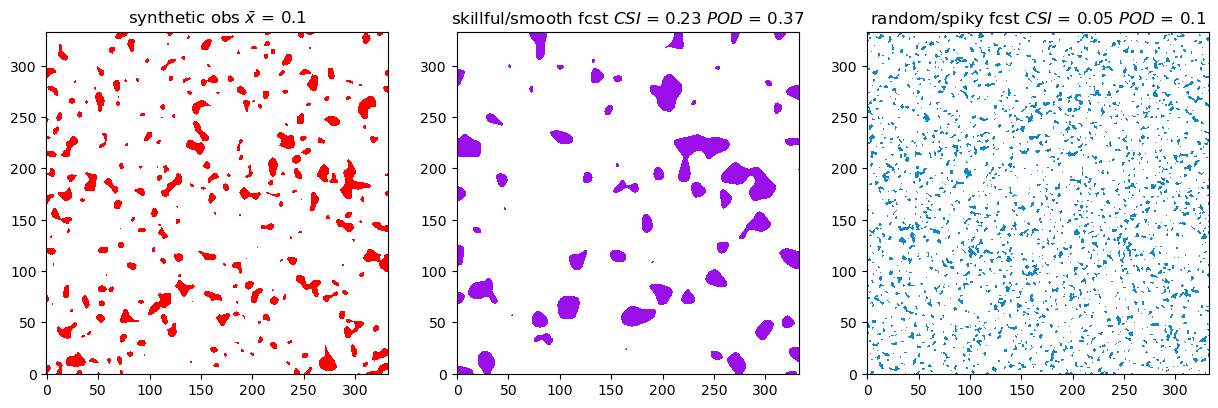

In [6]:
# synthetic 2-D observation forecast binary field generator

# colors
colorlist=['xkcd:fire engine red','xkcd:violet','xkcd:water blue','xkcd:medium green']

# seeds for random number generators
obs_rng = np.random.default_rng(10987654321)
fcst_rng = np.random.default_rng(42)

def make_regions(noise, sigma, prob):
    filtered = gaussian_filter(noise, sigma, mode='reflect')
    threshold = np.quantile(filtered, 1 - prob)
    return (filtered > threshold).astype('float')

def generate_obs_field(size, sigma, prob, rng=obs_rng):
    noise = rng.random(size)    
    return noise, make_regions(noise, sigma, prob)

def generate_forecast_field(truth_noise, sigma, prob, noise_weight, rng=obs_rng):
    noise = rng.random(truth_noise.shape)
    noise = noise_weight * noise + (1 - noise_weight) * truth_noise
    return make_regions(noise, sigma, prob)

# generate obs field with a moderate level of autocorrelation
obs_sigma = 3.

# generate a "skillful/smooth" forecast field with a higher level of compactness
skillfcst_sigma=6.
skill_error_weight=0.5

# generate a "random/spiky" forecast field with a low level of compactness
randfcst_sigma=1.
rand_error_weight=1.0

# specify base rate and bias
base_rate = 0.1
bias=1.

# domain size
ni, nj = 333, 333

# generate fields
obs_noise, obs = generate_obs_field((nj, ni), obs_sigma, base_rate)
skill_fcst = generate_forecast_field(obs_noise, skillfcst_sigma, bias*base_rate, noise_weight=skill_error_weight, rng=fcst_rng)
rand_fcst = generate_forecast_field(obs_noise, randfcst_sigma, bias*base_rate, noise_weight=rand_error_weight, rng=fcst_rng)

# calculate CSI
skill_csi=np.sum(obs*skill_fcst)/(np.sum(obs)+np.sum(skill_fcst)-np.sum(obs*skill_fcst))
rand_csi=np.sum(obs*rand_fcst)/(np.sum(obs)+np.sum(skill_fcst)-np.sum(obs*rand_fcst))
skill_pod=np.sum(obs*skill_fcst)/np.sum(obs)
rand_pod=np.sum(obs*rand_fcst)/np.sum(obs)

# plot these fields
fig,ax = plt.subplots(1,3,figsize=(15,6))
axs=ax.flat

cmap_obs=colors.ListedColormap(['white',colorlist[0]])
axs[0].imshow(obs, cmap=cmap_obs, origin='lower')
axs[0].set_title(r'synthetic obs $\bar x$ = '+f'{base_rate}')

cmap_fcst=colors.ListedColormap(['white',colorlist[1]])
axs[1].imshow(skill_fcst, cmap=cmap_fcst, origin='lower')
axs[1].set_title(r'skillful/smooth fcst $CSI$ = '+f'{np.round(skill_csi,2)} $POD$ = '+f'{np.round(skill_pod,2)}')

cmap_rand=colors.ListedColormap(['white',colorlist[2]])
axs[2].imshow(rand_fcst, cmap=cmap_rand, origin='lower')
axs[2].set_title(r'random/spiky fcst $CSI$ = '+f'{np.round(rand_csi,2)} $POD$ = '+f'{np.round(rand_pod,2)}')

### calculate FSS for this example

The code below computes the fractions of the observations, skillful/smooth forecast, and random/spiky forecast. The "convolve" function from scipy.ndimage ('reflective' mode as recommended by Antonio and Aitchison 2025) is used to calculate the fractions across a range of neighborhood window sizes. A variety of statistics are calculated for each neighborhood scale, including FSS and correlation coefficient. 

In [7]:
# calculate FSS and various stats across a range of 2-D neighborhood windows
# using 'reflective' convolution from scipy.ndimage

fss_skill=np.zeros(31)
fss_rand=np.zeros_like(fss_skill)
sx_2_n=np.zeros_like(fss_skill)
xbar_n=np.zeros_like(fss_skill)
sf_2_skill=np.zeros_like(fss_skill)
sf_x_skill=np.zeros_like(fss_skill)
sf_2_rand=np.zeros_like(fss_skill)
sf_x_rand=np.zeros_like(fss_skill)
fbar_skill=np.zeros_like(fss_skill)
fbar_rand=np.zeros_like(fss_skill)
win_width=np.zeros_like(fss_skill)
win_size=np.zeros_like(fss_skill)
rfx_skill=np.zeros_like(fss_skill)
rfx_rand=np.zeros_like(fss_skill)

for n in np.arange(fss_skill.shape[0]):
    iwin=n*2+1         
    win=iwin*iwin*1.0        # neighborhood window size in units of grid points
    obs_frac=convolve(obs,np.ones((iwin,iwin))/win,mode='reflect')     # use convolution to calculate the fractions
    skill_frac=convolve(skill_fcst,np.ones((iwin,iwin))/win,mode='reflect')
    rand_frac=convolve(rand_fcst,np.ones((iwin,iwin))/win,mode='reflect')
    # compute various stats from the fractions
    win_width[n]=iwin
    win_size[n]=win
    sx_2_n[n]=np.var(obs_frac)
    xbar_n[n]=np.mean(obs_frac)
    sf_2_skill[n]=np.var(skill_frac)
    fbar_skill[n]=np.mean(skill_frac)
    sf_x_skill[n]=np.cov([obs_frac.flatten(),skill_frac.flatten()])[0][1]
    fss_skill[n]=1.-np.sum((skill_frac-obs_frac)**2.)/(np.sum(skill_frac**2.)+np.sum(obs_frac**2.))
    rfx_skill[n]=np.corrcoef([obs_frac.flatten(),skill_frac.flatten()])[0][1]
    sf_2_rand[n]=np.var(rand_frac)
    fbar_rand[n]=np.mean(rand_frac)
    sf_x_rand[n]=np.cov([obs_frac.flatten(),rand_frac.flatten()])[0][1]
    fss_rand[n]=1.-np.sum((rand_frac-obs_frac)**2.)/(np.sum(rand_frac**2.)+np.sum(obs_frac**2.))
    rfx_rand[n]=np.corrcoef([obs_frac.flatten(),rand_frac.flatten()])[0][1]


### plot FSS, normalized sharpness, and correlation vs neighborhood size

The code below generates a plot of FSS versus neighborhood window width (length of the "nxn" square window in terms of grid points) and compares the skillful/smooth forecast to the random/spiky forecast in the left subplot. Dashed black line in left-hand chart represents “uniform FSS” baseline which is commonly-used to determine the useful scales of the forecast, defined by Roberts and Lean (2008) as $FSS_{uniform}=\frac{1+\bar x}{2}$. We follow Antonio and Aitchison (2025) and plot the correlation coefficient and normalized sharpness ($s_f$/$s_x$) in the right subplot.

(-0.25, 2.05)

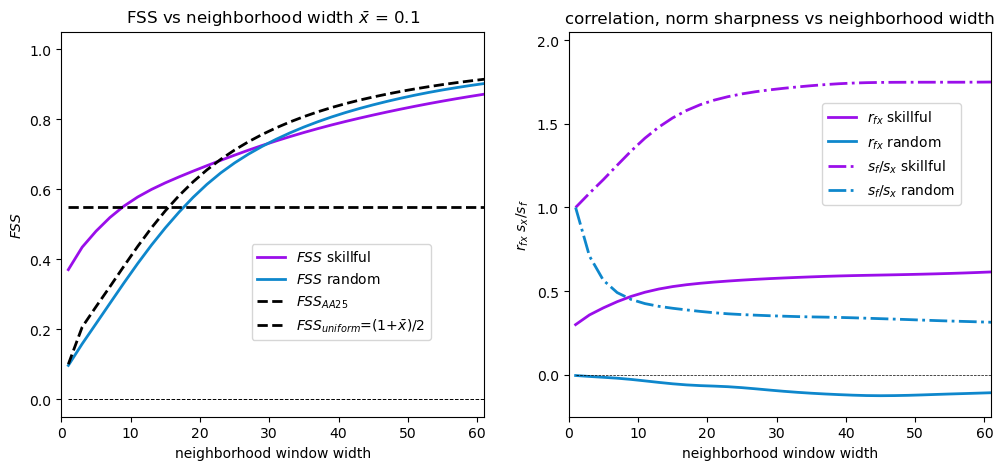

In [12]:
# FSS on the left subplot, correlation and normalized sharpness on the right subplot
# following Antonio and Aitchison (2025)

xbar=np.mean(obs)

fig,ax = plt.subplots(1,2,figsize=(12,5))
axs=ax.flat

fss_aa25=2.*xbar*xbar/(2.*xbar*xbar+sx_2_n+xbar*(1.-xbar)/win_size)
axs[0].plot(win_width,fss_skill,c=colorlist[1],lw=2.,label=r'$FSS$ skillful')
axs[0].plot(win_width,fss_rand,c=colorlist[2],lw=2.,label=r'$FSS$ random')
axs[0].plot(win_width,fss_aa25,c='k',ls='--',lw=2.,label=r'$FSS_{AA25}$')
axs[0].plot(win_width,np.zeros_like(win_width)+0.55,c='k',ls='--',lw=2.,label=r'$FSS_{uniform}$=(1+$\bar x$)/2')
axs[0].plot(win_width,np.zeros_like(win_width),c='k',ls='--',lw=0.7)
axs[0].legend(loc=[0.45,0.2])
axs[0].set_xlabel('neighborhood window width')
axs[0].set_ylabel(r'$FSS$')
axs[0].set_title(r'FSS vs neighborhood width $\bar x$ ='+f' {np.round(xbar,2)}')
axs[0].set_ylim(-0.05,1.05)
axs[0].set_xlim(0.,np.max(win_width))

axs[1].plot(win_width,rfx_skill,c=colorlist[1],lw=2.,label=r'$r_{fx}$ skillful')
axs[1].plot(win_width,rfx_rand,c=colorlist[2],lw=2.,label=r'$r_{fx}$ random')
axs[1].plot(win_width,np.sqrt(sf_2_skill)/np.sqrt(sx_2_n),c=colorlist[1],lw=2.,ls='-.',label=r'$s_f$/$s_x$ skillful')
axs[1].plot(win_width,np.sqrt(sf_2_rand)/np.sqrt(sx_2_n),c=colorlist[2],lw=2.,ls='-.',label=r'$s_f$/$s_x$ random')
axs[1].plot(win_width,np.zeros_like(win_width),c='k',ls='--',lw=0.5)
axs[1].legend(loc=[0.6,0.55])
axs[1].set_xlabel('neighborhood window width')
axs[1].set_ylabel(r'$r_{fx}$ $s_x$/$s_f$')
axs[1].set_title(r'correlation, norm sharpness vs neighborhood width')
#axs[1].set_title(r'correlation, sharpness vs neighborhood width')
axs[1].set_xlim(0.,np.max(win_width))
axs[1].set_ylim(-0.25,2.05)

### FSS behavior

For each of the forecasts in this example, $FSS$ increases monotonically and approaches the "asymptotic" value of 1 that is expected for unbiased forecasts (Roberts and Lean 2008). For the skillful/smooth forecast, $FSS$ starts at the grid scale (window width = 1) with a value of ~0.37 (equal to POD computed from binary forecasts and observations)) and increases with increasing neighborhood window size, exceeding what is typically used as the baseline for determining the scale for useful forecasts (defined as $FSS_{uniform}=\frac{1+\bar x}{2}$ by Roberts and Lean (2008) who described it as "halfway between random forecast skill and perfect skill") for a neighborhood window ~9 points in width. $FSS$ for the random/spiky forecast starts at the grid scale with a value of 0.1 (also equal to POD from random forecast) and exceeds the $FSS_{uniform}$ baseline for neighborhood window widths beyond ~20 grid points. In fact, $FSS$ from the random forecast exceeds that from the skillful/smooth forecast for neighborhood widths beyond ~30 grid points.

Antonio and Aitchison (2025) and Skok and Roberts (2016) found similar FSS behavior for random forecasts (increasing with neighborhood scale). Antonio and Aitchison (2025) recommended using $FSS$ from a random unbiased forecast with no autocorrelation as the "reference"  curve when deriving "skill". Using this approach in this example, the skillful/smooth forecast would be not be considered skillful for neighborhood scales beyond 30 grid points in width. However, the right subplot above shows the correlation coefficient for the skillful forecast increasing with increasing neighborhood scale before reaching a plateau near $r_{fx} \approx 0.6$ for windows greater than ~30 grid points in width. This behavior might be expected from a forecast that is generally "close" to the observations. On the other hand, the random forecast shows nearly zero correlation with the observed fractions, even decreasing slightly as neighborhood window width increases. Since both the skillful and random forecasts show monotonically increasing FSS scores, it is difficult to find a signal of this "plateau" in performance (or determining the scale where that occurs) in the skillful forecast by analyzing the FSS values alone. Typical analysis of $FSS$ of the random/spiky forecast might have also identified useful scales from that forecast, but seeing that the correlation coefficient remains near/below zero across all neighborhood sizes clearly indicates that the random forecast would not be useful at any scale in this example.

The normalized sharpness ($s_f$/$s_x$) for each of the example forecasts start with a value of 1 at the grid scale, which is expected for an unbiased binary forecast ($\bar f = \bar x$, $s_f^2 = s_x^2 = \bar x (1 - \bar x)$). As the neighborhood averaging window size increases, the normalized sharpness of the skillful/smooth forecast increases, while it decreases for the random/spiky forecast, before both reach nearly constant values beyond window sizes of approximately 30 and larger. The change of normalized sharpness with increasing averaging scale provides information about the multi-scale structure of the forecast fraction fields compared to the observed fields. These results suggest that $FSS$ is sensitive to the degree of "smoothness" or intermittency in the binary fields. As previously discussed, several researchers have also noted $FSS$ sensitivities to base rate and bias. We can better understand the behavior of $FSS$ by analyzing the behavior of the "reference" (baseline) used in the definition of the score.



Text(0.5, 1.0, 'stats vs neighborhood scale $\\bar x$ = 0.1')

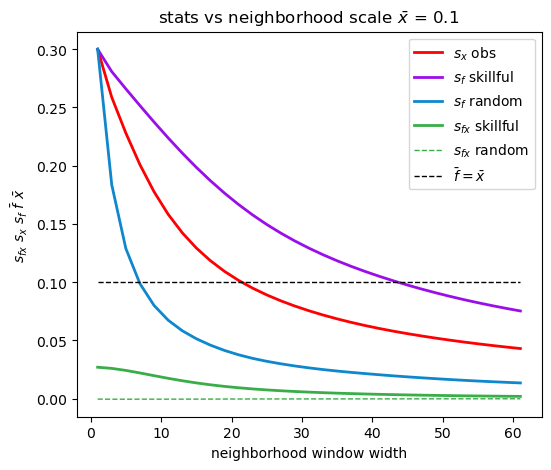

In [9]:
# compare the stats
xbar=np.mean(obs)

fig,axs = plt.subplots(figsize=(6,5))

axs.plot(win_width,np.sqrt(sx_2_n),c=colorlist[0],lw=2.,label=r'$s_x$ obs')
axs.plot(win_width,np.sqrt(sf_2_skill),c=colorlist[1],lw=2.,label=r'$s_f$ skillful')
axs.plot(win_width,np.sqrt(sf_2_rand),c=colorlist[2],lw=2.,label=r'$s_f$ random')
axs.plot(win_width,sf_x_skill,c=colorlist[3],lw=2.,label=r'$s_{fx}$ skillful')
axs.plot(win_width,sf_x_rand,c=colorlist[3],lw=1.,ls='--',label=r'$s_{fx}$ random')
axs.plot(win_width,xbar_n,c='k',lw=1.,ls='--',label=r'$\bar f = \bar x$')
axs.legend(loc='upper right')
axs.set_xlabel('neighborhood window width')
axs.set_ylabel(r'$s_{fx}$ $s_x$ $s_f$ $\bar f$ $\bar x$')
axs.set_title(r'stats vs neighborhood scale $\bar x$ ='+f' {np.round(xbar,2)}')



### multi-scale variability of fields
By analyzing the sample variances (standard deviations are plotted above) of the fractions across increasing neighborhood averaging windows, information regarding the differences in the multi-scale structure of the forecast and observed fields can be obtained. The variances of the forecast and observed fractions decrease monotonically as the neighborhood window size increases. Analyzing the rate at which the variance of the field decreases with increasing averaging scale is a form of "moment-scale" analysis, which Harris et al. (2001) noted provides information about the degree of "intermittency" in a field. A highly intermittent field will have localized peaks which will diminish drastically in amplitude as they are averaged across larger neighborhood windows. For more contiguous/less intermittent fields, blocks of high values are spread across multiple grid boxes, so the neighborhood averaging will diminish the variance at a reduced rate as the window size increases. Comparing these scale-dependent statistics of the forecasts compared to the observations can provide insight into the relative degree of "realism" in the forecast fields.

In the skillful/smooth forecast example above (purple), the variance of the forecast fractions decreases with neighborhood size at a reduced rate compared to the observations. In this case, the forecasts were generated using a larger Gaussian kernel width than the synthetic observations, the greater smoothing resulted in a field with relatively high autocorrelation/low intermittency. The more "contiguous" blocks of binary forecast points maintain higher values of the fractions when compared to the more intermittent observed fractions as the neighborhood averaging process continues, so we should expect the variance of those forecast fractions to remain larger than the observed variance as the neighborhood sizes increase (normalized sharpness > 1). The forecast/observation covariance (green, solid) also decreases as the neighborhood size gets larger since the magnitude of the covariance cannot exceed the geometric mean of the variances. The means of the forecast and observed fractions remain constant with increasing neighborhood size, as expected for a "reflective" convolution operator.

For the random/spiky forecast example (blue), the variance of the random forecast decreases with neighborhood size at a steeper rate compared to the reduction of observed variance. In this case, the random forecast field was generated using a smaller Gaussian kernel width than the observations. This highly intermittent field shows a rapid reduction in variance as the neighborhood averaging scale increases. For the random forecast, the forecast/observation covariance is nearly zero across all neighborhood scales.



### autocorrelation factor and normalized sharpness

Antonio and Aitchison (2025) derived expressions that showed how the variance of fractions produced by a binary field vary with the number of points within the neighborhood window (which we will call the "neighborhood size" $N_w={width}^2$) and found that to be equal to the variance of the binary field (at the grid scale; $s_x^2[n=1]$) divided by the neighborhood size, multiplied by a factor that increases with increasing autocorrelation in the original binary field. Using our notation, we should expect the observed variance to vary with neighborhood size as follows:

\begin{equation}
s_x^2[n]=s_x^2[n=1]\frac{A_{nx}}{N_w}=\bar x(1-\bar x)\frac{A_{nx}}{N_w}
\end{equation}

where $N_w$ is the neighborhood window size and $A_{nx}$ is the autocorrelation factor of the observed fractions at the n-th neighborhood. Antonio and Aitchison (2025) showed that the autocorrelation factor was equal to one ($A_{nx}=1$) if there was no autocorrelation in the field and increases with greater autocorrelation. 

The forecast fractions will follow a similar reduction in variance, with perhaps differing autocorrelation factors in the forecast fields.

\begin{equation}
s_f^2[n]=s_f^2[n=1]\frac{A_{nf}}{N_w}=\bar f(1-\bar f)\frac{A_{nf}}{N_w}
\end{equation}

In the special case where the forecasts are unbiased ($\bar f = \bar x$, $s_f^2[n=1]=s_x^2[n=1]$) the normalized sharpness at the grid scale will be equal to one and there will be a simple relationship between normalized sharpness and the square root of the ratio of autocorrelation factors as neighborhood windows increase in size:

\begin{equation}
\frac{s_f[n]}{s_x[n]}=\sqrt{\frac{A_{nf}}{A_{nx}}}
\end{equation}

The plots below show these autocorrelation factors for the example data, with the skillful/smooth forecast showing the highest autocorrelation, followed by the observations, then the random/spiky forecast with $A_{nf} \approx 1$. The resulting estimates of the normalized sharpness from the ratio of the autocorrelation factors (right subplot) matches the plot of the sharpness values in the previous section. For unbiased forecasts, analyzing the change in normalized sharpness with increasing neighborhood averaging window size provides information on the differences in multi-scale structure between the forecast and observed fields. When normalized sharpness is greater than 1, the forecast fractions are more "blocky"/less intermittent than the observed fractions, and vice versa.

(0.0, 61.0)

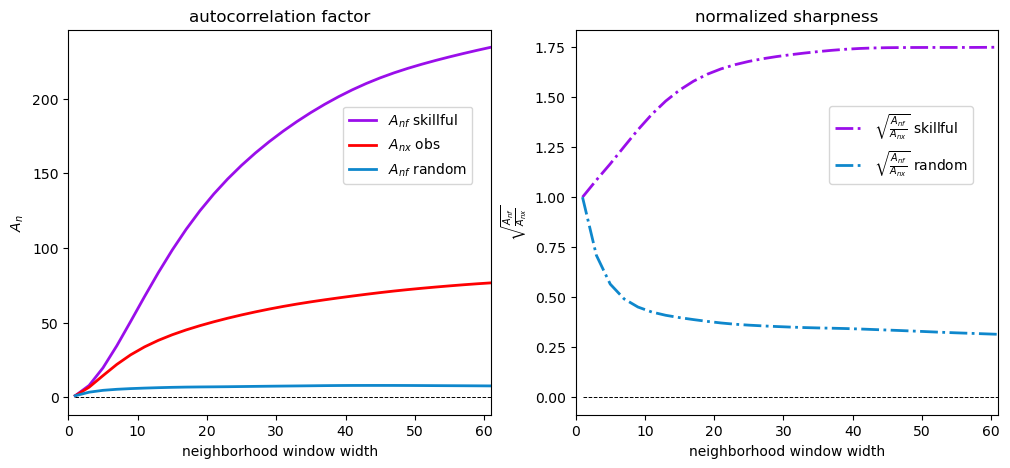

In [10]:
# autocorrelation factor in our 1-D example
fig,ax = plt.subplots(1,2,figsize=(12,5))
axs=ax.flat

s_x_2_0=np.var(obs)
s_f_2_0_skill=np.var(skill_fcst)
s_f_2_0_rand=np.var(rand_fcst)
a_n_obs=sx_2_n*win_size/s_x_2_0
a_n_skill=sf_2_skill*win_size/s_f_2_0_skill
a_n_rand=sf_2_rand*win_size/s_f_2_0_rand
axs[0].plot(win_width,a_n_skill,c=colorlist[1],lw=2.,label=r'${A_{nf}}$ skillful')
axs[0].plot(win_width,a_n_obs,c=colorlist[0],lw=2.,label=r'${A_{nx}}$ obs')
axs[0].plot(win_width,a_n_rand,c=colorlist[2],lw=2.,label=r'${A_{nf}}$ random')
axs[0].plot(win_width,np.zeros_like(win_width),c='k',ls='--',lw=0.7)
axs[0].legend(loc=[0.65,0.6])
axs[0].set_xlabel('neighborhood window width')
axs[0].set_ylabel(r'$A_n$')
axs[0].set_title(r'autocorrelation factor')
axs[0].set_xlim(0.,61.)

axs[1].plot(win_width,np.sqrt(a_n_skill/a_n_obs),c=colorlist[1],lw=2.,ls='-.',label=r'$\sqrt{\frac{A_{nf}}{A_{nx}}}$ skillful')
axs[1].plot(win_width,np.sqrt(a_n_rand/a_n_obs),c=colorlist[2],lw=2.,ls='-.',label=r'$\sqrt{\frac{A_{nf}}{A_{nx}}}$ random')
axs[1].plot(win_width,np.zeros_like(win_width),c='k',ls='--',lw=0.7)
axs[1].legend(loc=[0.6,0.6])
axs[1].set_xlabel('neighborhood window width')
axs[1].set_ylabel(r'$\sqrt{\frac{A_{nf}}{A_{nx}}}$')
axs[1].set_title(r'normalized sharpness')
axs[1].set_xlim(0.,61.)


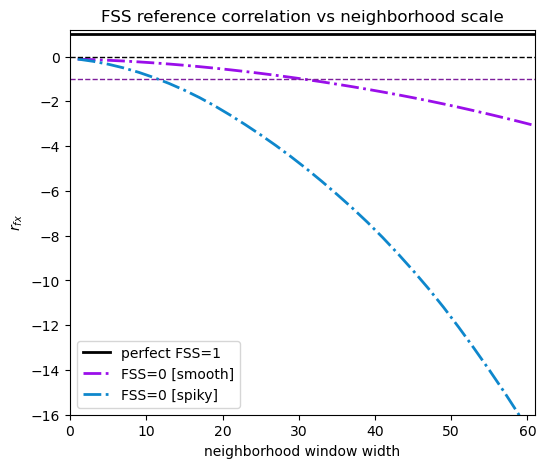

In [11]:
# correlation of FSS reference forecast

rfx_ref_skill=-1.*np.mean(skill_fcst)*np.mean(obs)/np.sqrt(sx_2_n)/np.sqrt(sf_2_skill)
rfx_ref_rand=-1.*np.mean(rand_fcst)*np.mean(obs)/np.sqrt(sx_2_n)/np.sqrt(sf_2_rand)

fig,axs = plt.subplots(figsize=(6,5))

#axs.plot(win_width,rfx_skill,c=colorlist[1],lw=2.,label=r'$r_{fx}$ skillful')
#axs.plot(win_width,rfx_rand,c=colorlist[2],lw=2.,label=r'$r_{fx}$ random')

axs.plot([0.,61.],[1.,1.],c='k',lw=2.,label=r'perfect FSS=1')
axs.plot(win_width,rfx_ref_skill,c=colorlist[1],lw=2.,ls='-.',label=r'FSS=0 [smooth]')
axs.plot(win_width,rfx_ref_rand,c=colorlist[2],lw=2.,ls='-.',label=r'FSS=0 [spiky]')
axs.set_xlabel('neighborhood window width')
axs.set_ylabel(r'$r_{fx}$')
axs.set_title(r'FSS reference correlation vs neighborhood scale')
axs.plot([0.,61.],[-1.,-1.],c='xkcd:purple',ls='--',lw=1.)
axs.plot([0.,61.],[0.,0.],c='k',ls='--',lw=1.)
axs.set_xlim(0.,61.)
axs.set_ylim(-16.,1.2)
axs.legend()

(0.0, 1.0)

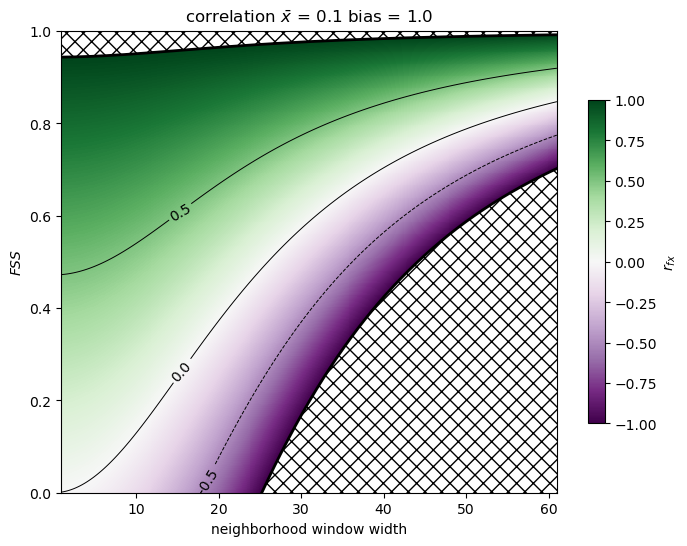

In [487]:
xbar1=0.1
xodds=xbar1/(1.-xbar1)
anx1=50.
anf1=100.
b1=1.
nw1=np.linspace(1.0,61.0,501)
fss1=np.linspace(0.0,1.0,501)
fig, axs = plt.subplots(figsize=(8,6))

nw2,fss2=np.meshgrid(nw1,fss1)
sf2=b1*xbar1*(1.-b1*xbar1)*anf1/nw2/nw2
sx2=xbar1*(1.-xbar1)*anx1/nw2/nw2
sf1=b1*xbar1*(1.-b1*xbar1)*anf1/nw1/nw1
sx1=xbar1*(1.-xbar1)*anx1/nw1/nw1
fsstop=(b1*xbar1*xbar1+np.sqrt(sf1)*np.sqrt(sx1))/(0.5*(sf1+sx1)+0.5*(b1*b1+1.)*xbar1*xbar1)
fssbot=(b1*xbar1*xbar1-np.sqrt(sf1)*np.sqrt(sx1))/(0.5*(sf1+sx1)+0.5*(b1*b1+1.)*xbar1*xbar1)

term1=((0.5*(sf2+sx2)+0.5*(b1*b1+1.)*xbar1*xbar1)*fss2-b1*xbar1*xbar1)/np.sqrt(sf2)/np.sqrt(sx2)
#term1=fss2+xodds*nw2/an1*(fss2-1.)
term1[term1<-1.]=np.nan
term1[term1>1.]=np.nan


sc1=axs.pcolormesh(nw2,fss2,term1,cmap='PRGn',vmin=-1.,vmax=1.)
cs1=axs.contour(nw2,fss2,term1,colors='k',levels=[-0.5,0.,0.5],linewidths=0.7)
axs.clabel(cs1, cs1.levels, inline=True, fontsize=10)
plt.colorbar(sc1,orientation='vertical',shrink=0.7,label=r'$r_{fx}$',ax=axs)
axs.plot(nw1,fsstop,'k',lw=2.)
axs.plot(nw1,fssbot,'k',lw=2.)
axs.set_title(r'correlation $\bar x$'+f' = {xbar1} bias = {b1}')
axs.set_xlabel(r'neighborhood window width')
axs.set_ylabel(r'$FSS$')
xmin, xmax = axs.get_xlim()
ymin, ymax = axs.get_ylim()
xy = (xmin+0.001,ymin+0.001)
width = xmax - xmin - 0.002
height = ymax - ymin - 0.002
# create the patch and place it in the back of countourf (zorder!)
p = patches.Rectangle(xy, width, height, hatch='xx', linewidth=0,fill=None, zorder=-10)
axs.add_patch(p)
axs.set_ylim(0.,1.)
#axs.plot([1.,1.],[0.,1.],'k--',lw=0.7)


## plot correlation in FSS space

# END

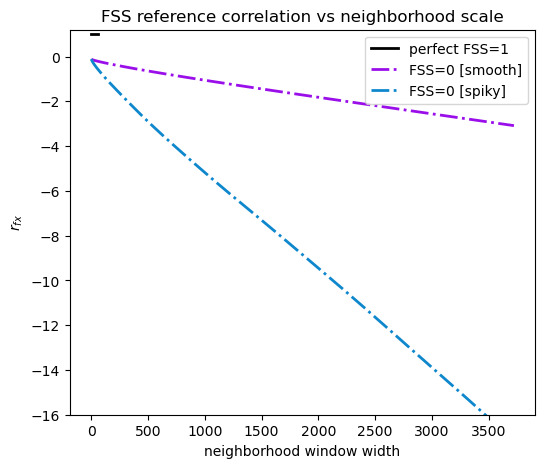

In [447]:
# correlation of FSS reference forecast

rfx_ref_skill=-1.*np.mean(skill_fcst)*np.mean(obs)/np.sqrt(sx_2_n)/np.sqrt(sf_2_skill)
rfx_ref_rand=-1.*np.mean(rand_fcst)*np.mean(obs)/np.sqrt(sx_2_n)/np.sqrt(sf_2_rand)

fig,axs = plt.subplots(figsize=(6,5))

#axs.plot(win_width,rfx_skill,c=colorlist[1],lw=2.,label=r'$r_{fx}$ skillful')
#axs.plot(win_width,rfx_rand,c=colorlist[2],lw=2.,label=r'$r_{fx}$ random')

axs.plot([0.,61.],[1.,1.],c='k',lw=2.,label=r'perfect FSS=1')
axs.plot(win_size,rfx_ref_skill,c=colorlist[1],lw=2.,ls='-.',label=r'FSS=0 [smooth]')
axs.plot(win_size,rfx_ref_rand,c=colorlist[2],lw=2.,ls='-.',label=r'FSS=0 [spiky]')
axs.set_xlabel('neighborhood window width')
axs.set_ylabel(r'$r_{fx}$')
axs.set_title(r'FSS reference correlation vs neighborhood scale')
# axs.plot([0.,61.],[-1.,-1.],c='xkcd:purple',ls='--',lw=1.)
# axs.plot([0.,61.],[0.,0.],c='k',ls='--',lw=1.)
# axs.set_xlim(0.,61.)
axs.set_ylim(-16.,1.2)
axs.legend()

### irrational behavior of FSS reference forecast

The plots below illustrate the irrational behavior of the FSS reference forecast. On the left subplot the effective correlation coefficient for the reference forecast is plotted (black, dot-dashed) across a range of neighborhood windows for our 1-D example. As discussed previously, we find that the reference forecast correlation gets increasingly worse as the neighborhood window gets larger and falls below -1 for neighborhood windows larger than approximately 25 grid points. Since this establishes the FSS=0 baseline in the normalization, we should expect *all* forecasts to generally display increasing FSS with increasing neighbhorhood window size. Three other lines are displayed in this chart, the solid black line at $r_{fx}=1$, which defines the "perfect FSS=1" line, as well as two other constant correlation values, zero (thin black dashed) which represents the expected behavior of a random forecast, and -1 (thin purple dashed) which is the lower limit for any realistic value of correlation. These four lines are repeated in the right subplot in terms of $FSS$. Both the random ($r_{fx}=0$) and "worst" ($r_{fx}=-1$) curves display increasing FSS with neighborhood size, both exceeding the "uniform" value ($FSS_{uniform}=\frac{1+\bar x}{2}$, thick dashed) that is typically used to identify useful forecast scales. Clearly, this value is only "halfway between random forecast skill and perfect skill" (Roberts and Lean 2008) at the grid scale. The region below the $r_{fx}=-1$ curve in FSS space should be considered impossible to reach, similar to the "unachievable region" of performance diagrams described by Boyd et al. (2012).


### sensitivity to base rate, bias, and multi-scale variability/autocorrelation

Using the expressions from Antonio and Aitchison (2025) that show how the variance of fractions produced by a binary field vary with neighborhood size, we can derive an expression for the correlation of the FSS reference forecast as a function of neighborhood window size ($N_w$). We'll simplify the deriviation somewhat by assuming the autocorrelation factors are constants, while we found these to change as the neighborhood sizes grew in our example data, they quickly reached asympotic values and remained bounded within a relatively small range. In addition, we will substitute the defintion of the frequency bias $B=\frac{\bar f}{\bar x}$ as well as the geometric mean of the autocorrelation factors $\tilde A=\sqrt{A_x A_f}$

\begin{equation}
s_x^2=\bar x(1-\bar x)\frac{A_x}{N_w}
\end{equation}
\begin{equation}
s_f^2=\bar f(1-\bar f)\frac{A_f}{N_w}
\end{equation}

\begin{equation}
{r_{fx}}_{ref}=-\frac{\bar f \bar x}{s_f s_x}=-\frac{N_w}{\tilde A}\sqrt{\frac{B {\bar x}^2}{(1-B\bar x)(1-\bar x)}}
\end{equation}

We find that the correlation of the FSS reference forecast is directly proportional to the neighborhood window size, with a negative slope that depends on the base rate, frequency bias, autocorrelation factor of the fractions fields. 


Text(0, 0.5, '$\\tilde A$')

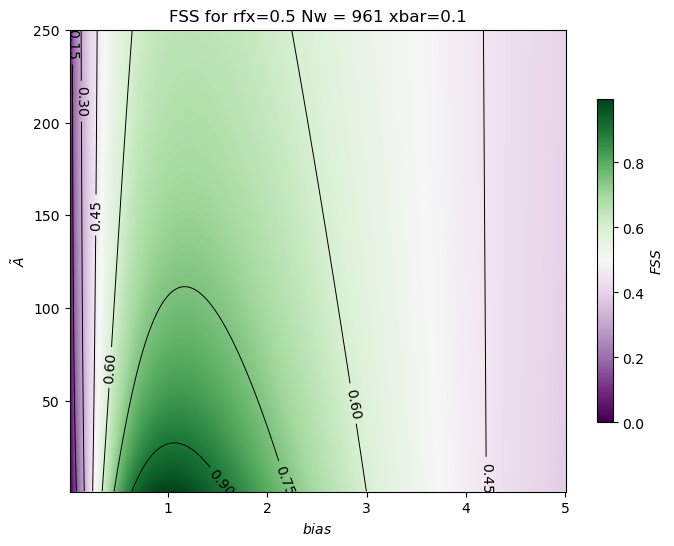

In [463]:
xbar1=0.1
nw1=31.*31.
#b1=1.
an1=np.linspace(1.0,250.0,500)
b1=np.linspace(0.01,5.0,500)
fig, axs = plt.subplots(figsize=(8,6))

b2,an2=np.meshgrid(b1,an1)
fss05=(an2*np.sqrt(b2*xbar1*xbar1*(1.-b2*xbar1)*(1.-xbar1))+2.*b2*xbar1*xbar1*nw1)/(b2*xbar1*an2*(1.-b2*xbar1)+xbar1*an2*(1.-xbar1)+(b2*b2+1.)*xbar1*xbar1*nw1)
#xb2,an2=np.meshgrid(xb1,an1)
#nwcrit=np.sqrt(an2/np.sqrt(b1*xb2*xb2/(1.-b1*xb2)/(1.-xb2)))

sc1=axs.pcolormesh(b2,an2,fss05,cmap='PRGn',vmin=0.)
cs1=axs.contour(b2,an2,fss05,colors='k',linewidths=0.7)
axs.clabel(cs1, cs1.levels, inline=True, fontsize=10)
plt.colorbar(sc1,orientation='vertical',shrink=0.7,label=r'$FSS$',ax=axs)

axs.set_title(r'FSS for rfx=0.5 Nw = 961 xbar=0.1')
axs.set_xlabel(r'$bias$')
axs.set_ylabel(r'$\tilde A$')



Text(0, 0.5, '$\\tilde A$')

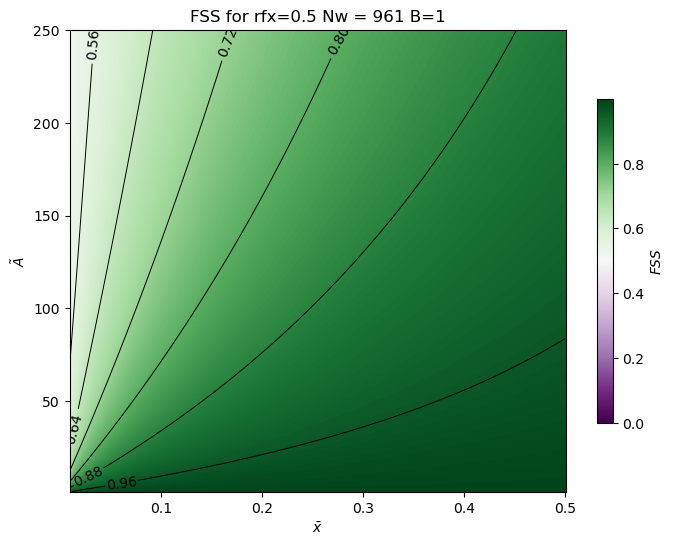

In [464]:
#xbar1=0.1
nw1=31.*31.
b2=1.
an1=np.linspace(1.0,250.0,500)
xb1=np.linspace(0.01,0.5,500)
fig, axs = plt.subplots(figsize=(8,6))

#b2,an2=np.meshgrid(b1,an1)
#fss05=(an2*np.sqrt(b2*xbar1*xbar1*(1.-b2*xbar1)*(1.-xbar1))+2.*b2*xbar1*xbar1*nw1)/(b2*xbar1*an2*(1.-b2*xbar1)+xbar1*an2*(1.-xbar1)+(b2*b2+1.)*xbar1*xbar1*nw1)
xb2,an2=np.meshgrid(xb1,an1)
fss05=(an2*np.sqrt(b2*xb2*xb2*(1.-b2*xb2)*(1.-xb2))+2.*b2*xb2*xb2*nw1)/(b2*xb2*an2*(1.-b2*xb2)+xb2*an2*(1.-xb2)+(b2*b2+1.)*xb2*xb2*nw1)

#nwcrit=np.sqrt(an2/np.sqrt(b1*xb2*xb2/(1.-b1*xb2)/(1.-xb2)))

sc1=axs.pcolormesh(xb2,an2,fss05,cmap='PRGn',vmin=0.)
cs1=axs.contour(xb2,an2,fss05,colors='k',linewidths=0.7)
axs.clabel(cs1, cs1.levels, inline=True, fontsize=10)
plt.colorbar(sc1,orientation='vertical',shrink=0.7,label=r'$FSS$',ax=axs)

axs.set_title(r'FSS for rfx=0.5 Nw = 961 B=1')
axs.set_xlabel(r'$\bar x$')
axs.set_ylabel(r'$\tilde A$')



Text(0, 0.5, '$\\tilde A$')

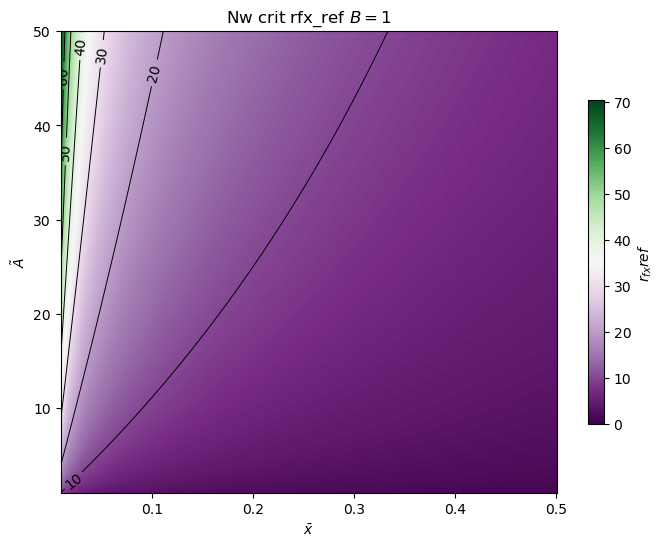

In [459]:
# xbar1=0.1
# xodds=xbar1/(1.-xbar1)
anx1=1.
anf1=1.
b1=1.
an1=np.linspace(1.0,50.0,500)
xb1=np.linspace(0.01,0.5,500)
fig, axs = plt.subplots(figsize=(8,6))

#b2,an2=np.meshgrid(b1,an1)
#nwcrit=np.sqrt(an2/np.sqrt(b2*xbar1*xbar1/(1.-b2*xbar1)/(1.-xbar1)))
xb2,an2=np.meshgrid(xb1,an1)
nwcrit=np.sqrt(an2/np.sqrt(b1*xb2*xb2/(1.-b1*xb2)/(1.-xb2)))

sc1=axs.pcolormesh(xb2,an2,nwcrit,cmap='PRGn',vmin=0.)
cs1=axs.contour(xb2,an2,nwcrit,colors='k',linewidths=0.7)
axs.clabel(cs1, cs1.levels, inline=True, fontsize=10)
plt.colorbar(sc1,orientation='vertical',shrink=0.7,label=r'$r_{fx} ref$',ax=axs)

axs.set_title(r'Nw crit rfx_ref $B =1$')
axs.set_xlabel(r'$\bar x$')
axs.set_ylabel(r'$\tilde A$')



Text(0, 0.5, '$s_f$/$s_x$')

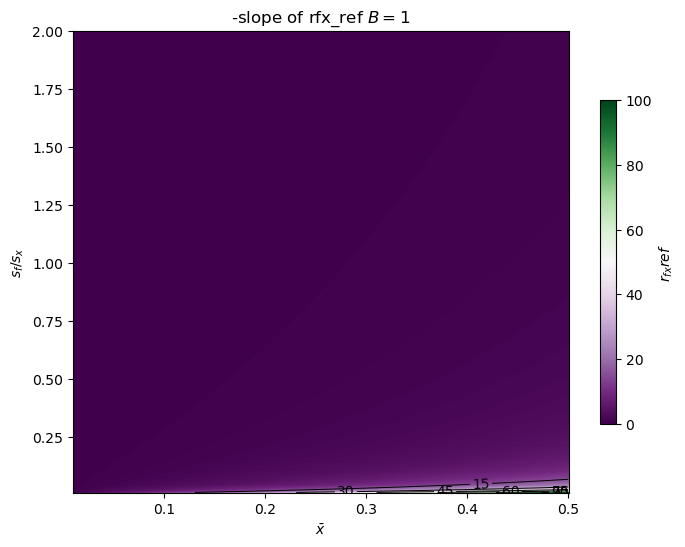

In [473]:
# -slope of rfx_ref vs Nw (width^2)
# bigger means it is easier to get a large value of FSS
# assuming bias = 1 since we usually do that

s1=np.linspace(0.01,2.0,500)
xb1=np.linspace(0.01,0.5,500)
fig, axs = plt.subplots(figsize=(8,6))

#b2,an2=np.meshgrid(b1,an1)
#nwcrit=np.sqrt(an2/np.sqrt(b2*xbar1*xbar1/(1.-b2*xbar1)/(1.-xbar1)))
xb2,s2=np.meshgrid(xb1,s1)
slope=xb2/s2/(1.-xb2)

sc1=axs.pcolormesh(xb2,s2,slope,cmap='PRGn',vmin=0.)
cs1=axs.contour(xb2,s2,slope,colors='k',linewidths=0.7)
axs.clabel(cs1, cs1.levels, inline=True, fontsize=10)
plt.colorbar(sc1,orientation='vertical',shrink=0.7,label=r'$r_{fx} ref$',ax=axs)

axs.set_title(r'-slope of rfx_ref $B =1$')
axs.set_xlabel(r'$\bar x$')
axs.set_ylabel(r'$s_f$/$s_x$')



In [470]:
slope

array([[1.01010101e+00, 1.11039066e+00, 1.21087966e+00, ...,
        9.92175024e+01, 9.96079843e+01, 1.00000000e+02],
       [5.05050505e-01, 5.55195331e-01, 6.05439831e-01, ...,
        4.96087512e+01, 4.98039922e+01, 5.00000000e+01],
       [3.36700337e-01, 3.70130221e-01, 4.03626554e-01, ...,
        3.30725008e+01, 3.32026614e+01, 3.33333333e+01],
       ...,
       [2.02831528e-03, 2.22970013e-03, 2.43148527e-03, ...,
        1.99231933e-01, 2.00016033e-01, 2.00803213e-01],
       [2.02425052e-03, 2.22523179e-03, 2.42661255e-03, ...,
        1.98832670e-01, 1.99615199e-01, 2.00400802e-01],
       [2.02020202e-03, 2.22078133e-03, 2.42175932e-03, ...,
        1.98435005e-01, 1.99215969e-01, 2.00000000e-01]])

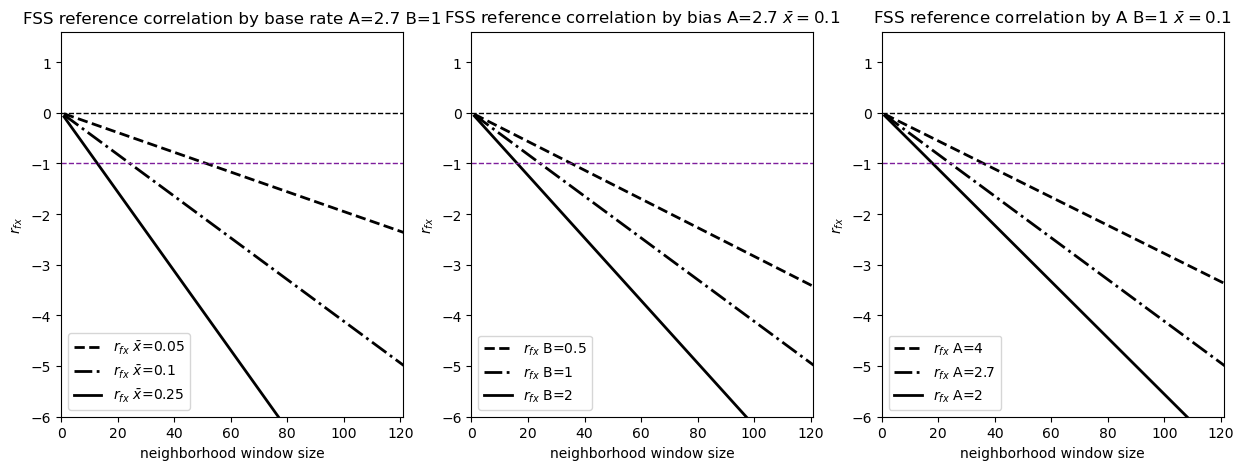

In [235]:
# correlation of the FSS reference sensitivity 

a1=2.7
bias1=1.0
bias2=2.0
bias05=0.5
xbar_10=0.1
xbar_05=0.05
xbar_25=0.25

rfx_ref_10=-1.*nwin*np.sqrt(bias1*xbar_10*xbar_10/(1.-bias1*xbar_10)/(1.-xbar_10))/a1
rfx_ref_05=-1.*nwin*np.sqrt(bias1*xbar_05*xbar_05/(1.-bias1*xbar_05)/(1.-xbar_05))/a1
rfx_ref_25=-1.*nwin*np.sqrt(bias1*xbar_25*xbar_10/(1.-bias1*xbar_25)/(1.-xbar_25))/a1

fig,ax = plt.subplots(1,3,figsize=(15,5))
axs=ax.flat

axs[0].plot(nwin,rfx_ref_05,c='k',lw=2.,ls='--',label=r'$r_{fx}$ $\bar x$=0.05')
axs[0].plot(nwin,rfx_ref_10,c='k',lw=2.,ls='-.',label=r'$r_{fx}$ $\bar x$=0.1')
axs[0].plot(nwin,rfx_ref_25,c='k',lw=2.,ls='-',label=r'$r_{fx}$ $\bar x$=0.25')

axs[0].set_xlabel('neighborhood window size')
axs[0].set_ylabel(r'$r_{fx}$')
axs[0].set_title(r'FSS reference correlation by base rate A=2.7 B=1')
axs[0].plot([0.,400.],[-1.,-1.],c='xkcd:purple',ls='--',lw=1.)
axs[0].plot([0.,400.],[0.,0.],c='k',ls='--',lw=1.)
axs[0].set_xlim(0.,121.)
axs[0].set_ylim(-6.,1.6)
axs[0].legend()

rfx_ref_1=-1.*nwin*np.sqrt(bias1*xbar_10*xbar_10/(1.-bias1*xbar_10)/(1.-xbar_10))/a1
rfx_ref_2=-1.*nwin*np.sqrt(bias2*xbar_10*xbar_10/(1.-bias2*xbar_10)/(1.-xbar_10))/a1
rfx_ref_05=-1.*nwin*np.sqrt(bias05*xbar_10*xbar_10/(1.-bias05*xbar_10)/(1.-xbar_10))/a1

axs[1].plot(nwin,rfx_ref_05,c='k',lw=2.,ls='--',label=r'$r_{fx}$ B=0.5')
axs[1].plot(nwin,rfx_ref_1,c='k',lw=2.,ls='-.',label=r'$r_{fx}$ B=1')
axs[1].plot(nwin,rfx_ref_2,c='k',lw=2.,ls='-',label=r'$r_{fx}$ B=2')

axs[1].set_xlabel('neighborhood window size')
axs[1].set_ylabel(r'$r_{fx}$')
axs[1].set_title(r'FSS reference correlation by bias A=2.7 $\bar x=0.1$')
axs[1].plot([0.,400.],[-1.,-1.],c='xkcd:purple',ls='--',lw=1.)
axs[1].plot([0.,400.],[0.,0.],c='k',ls='--',lw=1.)
axs[1].set_xlim(0.,121.)
axs[1].set_ylim(-6.,1.6)
axs[1].legend()

a2=2.0
a4=4.0
rfx_ref_a27=-1.*nwin*np.sqrt(bias1*xbar_10*xbar_10/(1.-bias1*xbar_10)/(1.-xbar_10))/a1
rfx_ref_a2=-1.*nwin*np.sqrt(bias1*xbar_10*xbar_10/(1.-bias1*xbar_10)/(1.-xbar_10))/a2
rfx_ref_a4=-1.*nwin*np.sqrt(bias1*xbar_10*xbar_10/(1.-bias1*xbar_10)/(1.-xbar_10))/a4


axs[2].plot(nwin,rfx_ref_a4,c='k',lw=2.,ls='--',label=r'$r_{fx}$ A=4')
axs[2].plot(nwin,rfx_ref_a27,c='k',lw=2.,ls='-.',label=r'$r_{fx}$ A=2.7')
axs[2].plot(nwin,rfx_ref_a2,c='k',lw=2.,ls='-',label=r'$r_{fx}$ A=2')

axs[2].set_xlabel('neighborhood window size')
axs[2].set_ylabel(r'$r_{fx}$')
axs[2].set_title(r'FSS reference correlation by A B=1 $\bar x=0.1$')
axs[2].plot([0.,400.],[-1.,-1.],c='xkcd:purple',ls='--',lw=1.)
axs[2].plot([0.,400.],[0.,0.],c='k',ls='--',lw=1.)
axs[2].set_xlim(0.,121.)
axs[2].set_ylim(-6.,1.6)
axs[2].legend()

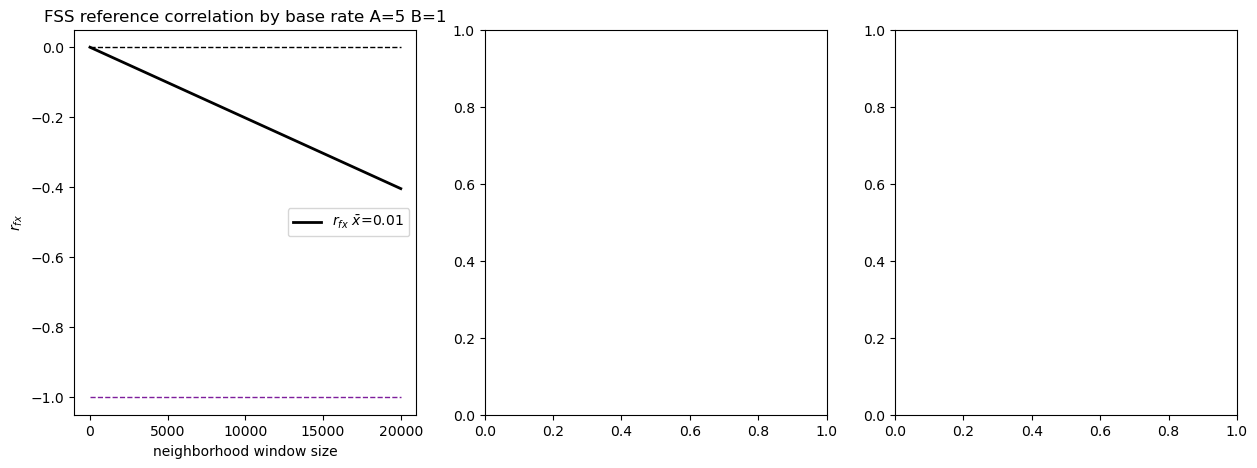

In [257]:
# correlation of the FSS reference sensitivity 

a5=500.
bias1=1.0
xbar_01=0.01

rfx_ref_rare=-1.*np.arange(20000)*np.sqrt(bias1*xbar_01*xbar_01/(1.-bias1*xbar_01)/(1.-xbar_01))/a5


fig,ax = plt.subplots(1,3,figsize=(15,5))
axs=ax.flat


axs[0].plot(np.arange(20000),rfx_ref_rare,c='k',lw=2.,ls='-',label=r'$r_{fx}$ $\bar x$=0.01')

axs[0].set_xlabel('neighborhood window size')
axs[0].set_ylabel(r'$r_{fx}$')
axs[0].set_title(r'FSS reference correlation by base rate A=5 B=1')
axs[0].plot([0.,20000.],[-1.,-1.],c='xkcd:purple',ls='--',lw=1.)
axs[0].plot([0.,20000.],[0.,0.],c='k',ls='--',lw=1.)
#axs[0].set_xlim(0.,121.)
#axs[0].set_ylim(-6.,1.6)
axs[0].legend()



### FSS expressed as a correlation-based skill score

Antonio and Aitchison (2025) showed that FSS could be decomposed in terms of the means, variances, and covariance of the forecast and observed fractions, we can rewrite this in terms of the difference between the correlation coefficients from the forecast and the reference forecast. 

\begin{equation}
FSS=\frac{2s_{fx}+2 \bar f \bar x}{s_f^2+s_x^2+{\bar f}^2+{\bar x}^2}=(r_{fx}-{r_{fx}}_{ref})\frac{2 s_f s_x}{s_f^2+s_x^2+{\bar f}^2+{\bar x}^2}
\end{equation}

Substituting the defintion of the frequency bias $B=\frac{\bar f}{\bar x}$, note that ${\bar f}^2=-B {s_{fx}}_{ref}$ and ${\bar x}^2=- {s_{fx}}_{ref}/B$:

\begin{equation}
FSS=(r_{fx}-{r_{fx}}_{ref})\frac{2 s_f s_x}{s_f^2+s_x^2-{s_{fx}}_{ref}(B+\frac{1}{B})}
\end{equation}

For the special case when the forecasted fractions are unbiased and have variances approximately equal to the observed variance:
\begin{equation}
FSS \approx \frac{r_{fx}-{r_{fx}}_{ref}}{1-{r_{fx}}_{ref}}
\end{equation}

In this case, we find that FSS is approximately a correlation-based skill score, using a reference forecast whose correlation gets increasingly more negative as the neighborhood window increases in size. Given the correlation of the reference forecast, this allows for simple expression of FSS for specific values of forecast/observation correlation. For example, for zero correlation (random forecast):
\begin{equation}
FSS[r_{fx}=0] \approx \frac{{r_{fx}}_{ref}}{{r_{fx}}_{ref}-1}
\end{equation}

For correlation equal to -1, which theoretically is the "worst" possible correlation (although for binary fields with base rates not equal to 0.5 a correlation value this low is not achievable):
\begin{equation}
FSS[r_{fx}= -1] \approx \frac{{r_{fx}}_{ref}+1}{{r_{fx}}_{ref}-1}
\end{equation}


### Simplified FSS decomposition

In order to better understand the scale-dependent behavior of FSS, we will consider how each of the terms in the FSS decomposition can vary with increasing neighborhood averaging window size. The neighborhood approach is designed to give credit to imperfect but “useful” forecasts, for instance forecasts that contain realistic variability along with some displacement in time or space. In such cases, one would expect the correlation between the forecast and observed fractions to increase as the neighborhood scale increases. However, this will not necessarily be the case, correlation could decrease or remain nearly constant with increasing scale (Antonio and Aitchison 2025 show examples where correlation decreases and then increases with neighborhood size). As previously discussed, the fractions means (which appear as the base rate and frequency bias here) are typically assumed to be constant with window size, and we expect that the variances of the fractions fields will decrease monotonically as the scale of the neighborhood averaging window increases. These terms are found in both the numerator and denominator of the expression, complicating the analysis of the behavior of FSS with increasing neighborhood scale.

At this point we will simplify the expression further by considering the situation when the variances of the forecasted and observed fractions are approximately the same ($s_f^2\approx s_x^2$) and the forecast is unbiased ($B=1$). This simplified version of FSS is expressed terms of the forecast/observation correlation coefficient, variance of the fractions, and the base rate;

\begin{equation}
FSS \approx r_{fx}\frac{s_x^2}{s_x^2+{\bar x}^2}+\frac{{\bar x}^2}{s_x^2+{\bar x}^2}
\end{equation}

This simplified expression allows us to anticipate how the “skillful” and “random” components of FSS will change with neighborhood scale. The variance of the fractions will decrease monotonically as the scale of the neighborhood averaging window increases, starting at the largest value at the grid scale (binary fields: $s_x^2=\bar x(1-\bar x)$), vanishing when the neighborhood reaches the size of the full domain. At the same time, we expect that the base rate will remain constant with increasing neighborhood scale. As a result, the denominator in both terms will start at the largest value at the grid scale (for binary fields  $s_x^2+{\bar x}^2=\bar x$) and approach the square of the base rate as the scale of the neighborhood window increases. The numerator of the “skillful” term will decrease monotonically, eventually reaching zero when the neighborhood reaches the size of the full domain. Therefore, we should expect that the “skillful” component of FSS will *decrease monotonically* with increasing neighborhood scale. On the other hand, the numerator in the “random” term remains constant, so we should expect the “random” component will *increase monotonically* with increasing neighborhood scale, approaching a value of one for an unbiased forecast (or the asymptotic value $FSS_{asym}=\frac{2 B}{B^2+1}$) for a biased forecast, Roberts and Lean 2008). Since FSS is the sum of these two terms, we should expect FSS will generally *increase* with neighborhood size and approach a relatively high value at large neighborhood window scales *regardless of the degree of correlation between the forecasts and observations*. This is problematic behavior for a measure of forecast skill.

(0.0, 61.0)

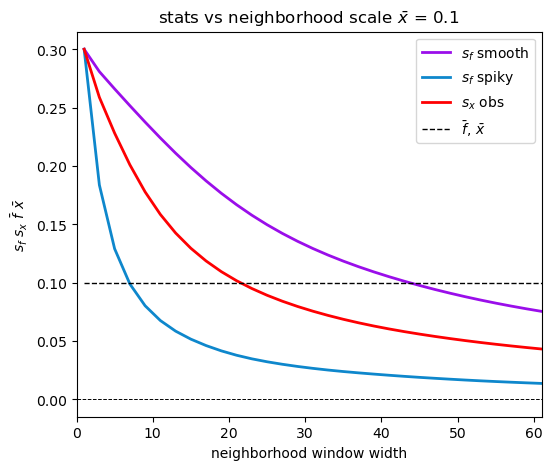

In [444]:
# compare the skillful forecast on the left-hand subplot to the random forecast in the right-hand subplot
xbar=np.mean(obs)

fig,axs = plt.subplots(figsize=(6,5))

#axs.plot(nwin,sf_x,c=colorlist[3],lw=3.,label=r'$s_{fx}$ fcst')

axs.plot(win_width,np.sqrt(sf_2_skill),c=colorlist[1],lw=2.,label=r'$s_f$ smooth')
axs.plot(win_width,np.sqrt(sf_2_rand),c=colorlist[2],lw=2.,label=r'$s_f$ spiky')
axs.plot(win_width,np.sqrt(sx_2_n),c=colorlist[0],lw=2.,label=r'$s_x$ obs')
axs.plot(win_width,fbar_skill,c='k',lw=1.,ls='--',label=r'$\bar f$, $\bar x$')
#axs.plot(nwin,xbar_1,c=colorlist[0],lw=1.,ls='--',label=r'$\bar x$ obs')
axs.plot([0.,400.],[0.,0.],c='k',ls='--',lw=0.7)
axs.legend(loc='upper right')
axs.set_xlabel('neighborhood window width')
axs.set_ylabel(r'$s_f$ $s_x$ $\bar f$ $\bar x$')
axs.set_title(r'stats vs neighborhood scale $\bar x$ ='+f' {np.round(xbar,2)}')
axs.set_xlim(0.,61.)





### analyze FSS components vs neighborhood window size

We'll look at how each of the FSS components in the Antonio and Aitchison (2025) decomposition vary with increasing neighborhood window size.
\begin{equation}
FSS=\frac{2r_{fx} s_f s_x+2 \bar f \bar x}{s_f^2+s_x^2+{\bar f}^2+{\bar x}^2}
=\frac{2s_{fx}+2 \bar f \bar x}{s_f^2+s_x^2+{\bar f}^2+{\bar x}^2}
\end{equation}

As expected, the variances of the forecast and observed fractions decrease monotonically as the neighborhood window size increases. Analyzing the rate at which the variance of the field decreases with increasing averaging scale was called "moment-scale" analysis by Harris et al. (2001), who showed that this type of analysis provides information about the degree of "intermittency" in a field. A highly intermittent field will have localized peaks and sharp gradients, which will diminish as they are averaged across larger neighborhood windows. For more contiguous/less intermittent fields, "peaks" are spread across multiple grid boxes, so the averaging will have less of an effect since higher values will remain located near other high values of the field even as the averaging scale increases. Comparing these  scale-dependent statistics of the forecasts compared to the observations can give us insight into the relative degree of "realism" in the forecast fields.

In the skillful forecast example on the left, the variance of the forecast (purple) decreases with neighborhood size at a reduced rate compared the observed fractions (red). In this case, the forecasts were generated by smoothing the observed field and shifting it by a few grid boxes, the smoothing resulted in a field with more autocorrelation/less intermittency. The more "contiguous" blocks of binary forecast points will maintain higher values of the fractions when compared to the more intermittent observed fractions as the neighborhood averaging process continues, so we should expect the variance of those forecast fractions to remain larger than the observed variance as the neighborhoods get larger (normalized sharpness > 1). We also see that the forecast/observation covariance decreases as the neighborhood sizes get larger, again as expected since the magnitude of the covariance cannot exceed the geometric mean of the variances. We also find that the means of the forecast and observed fractions remain constant with increasing neighborhood size, as expected for a "reflective" convolution operator.

In the random forecast example on the right, the variance of the random forecast (blue) decreases with neighborhood size at a increased rate compared the observed fractions (red). In this case, the forecasts were generated by a random number generator with no autocorrelation in the field. This highly intermittent field shows a rapid reduction in variance as the neighborhood averaging scale increases, compared to the observed field that contained a non-zero degree of autocorrelation from the AR(1) process (normalized sharpness < 1). For the random forecast, the forecast/observed fraction covariance is nearly zero across all neighborhood sizes.

## Centered Fractions Skill Score (CFSS)

To address these issues with FSS, a modified derivation of the fractions skill score based on the variance of forecast error will be presented as an alternative. Rather than using raw values of the forecasts and observations, in this alternate derivation forecast and observed variables will be “centered” by subtracting ther corresponding mean values, similar to how variables are centered in computations of variance and covariance. The centered mean square error of the fractions (Centered Fractions Brier Score) will be the base measure used to derive this alternate skill score. This is identical to calculating the variance of the forecast error, commonly used in the analysis of variance in linear regression. Taylor (2001) derived the geometric relationship between the centered MSE, variances of the observed and forecast fields, and correlation coefficient and showed how these could be combined on a single diagram (known as Taylor diagrams).

\begin{equation}
CFSS=1-\frac{\frac{1}{N}\sum((f_i-\bar f)-(x_i-\bar x))^2}{\frac{1}{N}\sum(f_i-\bar f)^2+\frac{1}{N}\sum(x_i-\bar x)^2}
=1-\frac{CFBS}{CFBS_{ref}}
\end{equation}

\begin{equation}
=1-\frac{\frac{1}{N}\sum(f_i-\bar f)^2+\frac{1}{N}\sum(x_i-\bar x)^2-\frac{2}{N}\sum{(f_i-\bar f)(x_i-\bar x)}}{\frac{1}{N}\sum(f_i-\bar f)^2+\frac{1}{N}\sum(x_i-\bar x)^2}
=1-\frac{s_f^2+s_x^2-2s_{fx}}{s_f^2+s_x^2}=\frac{2s_{fx}}{s_f^2+s_x^2}=HM(\frac{s_{fx}}{s_f^2},\frac{s_{fx}}{s_x^2})
\end{equation}
\begin{equation}
CFBS=s_f^2+s_x^2-2s_{fx}
\end{equation}
\begin{equation}
CFBS_{ref}=s_f^2+s_x^2
\end{equation}

In this CFSS derivation, the reference forecast has zero covariance with the observations, which is what is expected from a randomly-generated forecast. We should expect to find $CFSS \approx 0$ for random forecasts, which will be the "no skill" baseline for this score. Similar to how FSS can be expressed as a harmonic mean, we find that CFSS is the harmonic mean of the forecast/observation covariance, normalized by the variances of the forecasts and observations. 

To understand the scale-dependent behavior of this measure we will rewrite the expression in terms of correlation coefficient and normalized sharpness (below) and consider the general behavior of these components with increasing neighborhood size. Unlike FSS, there is no "random" term, CFSS has a single term that is the product of the correlation coefficient and a normalized sharpness factor. While we anticipate that correlation may increase with larger neighborhoods for skillful forecasts, that will not always be the case. In addition, we found in the 1-D example that sharpness can either increase or decrease with increasing neighborhood scale, but in general is bounded in a relatively small range and nearly constant, especially as the neighborhood window sizes get large. In that case we will find the CFSS to be directly proportional to correlation, without the undesirable scale-dependent asymptotic behavior found in FSS.
\begin{equation}
CFSS=r_{fx}\frac{2s_f/s_x}{(s_f/s_x)^2+1}
\end{equation}

(0.0, 61.0)

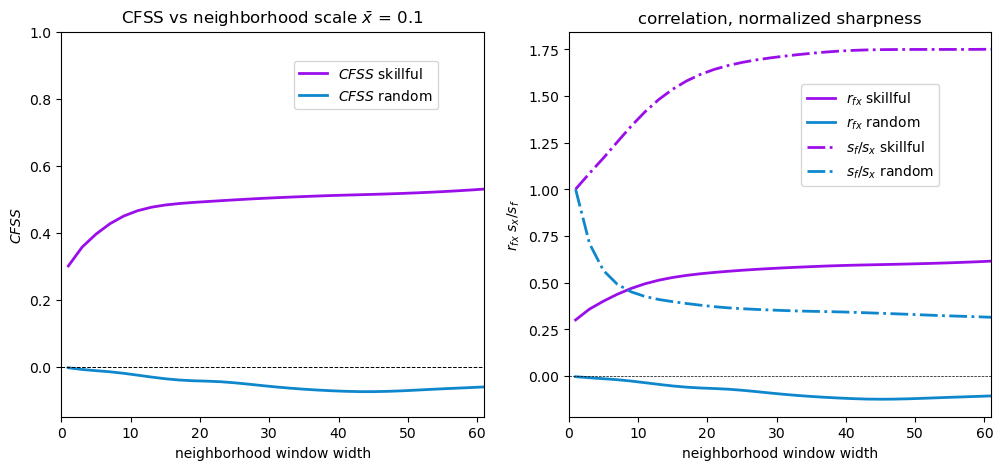

In [491]:
# CFSS on the left subplot, correlation and normalized sharpness on the right subplot

cfss_skill=2.*rfx_skill*np.sqrt(sf_2_skill/sx_2_n)/(sf_2_skill/sx_2_n+1.)
cfss_rand=2.*rfx_rand*np.sqrt(sf_2_rand/sx_2_n)/(sf_2_rand/sx_2_n+1.)

fig,ax = plt.subplots(1,2,figsize=(12,5))
axs=ax.flat
axs[0].plot(win_width,cfss_skill,c=colorlist[1],lw=2.,label=r'$CFSS$ skillful')
axs[0].plot(win_width,cfss_rand,c=colorlist[2],lw=2.,label=r'$CFSS$ random')
axs[0].plot([0.,61.],[0.,0.],c='k',ls='--',lw=0.7)
axs[0].legend(loc=[0.55,0.8])
axs[0].set_xlabel('neighborhood window width')
axs[0].set_ylabel(r'$CFSS$')
axs[0].set_title(r'CFSS vs neighborhood scale $\bar x$ ='+f' {np.round(xbar,2)}')
axs[0].set_xlim(0.,61.)
axs[0].set_ylim(-0.15,1.)

axs[1].plot(win_width,rfx_skill,c=colorlist[1],lw=2.,label=r'$r_{fx}$ skillful')
axs[1].plot(win_width,rfx_rand,c=colorlist[2],lw=2.,label=r'$r_{fx}$ random')
axs[1].plot(win_width,np.sqrt(sf_2_skill)/np.sqrt(sx_2_n),c=colorlist[1],lw=2.,ls='-.',label=r'$s_f$/$s_x$ skillful')
axs[1].plot(win_width,np.sqrt(sf_2_rand)/np.sqrt(sx_2_n),c=colorlist[2],lw=2.,ls='-.',label=r'$s_f$/$s_x$ random')

axs[1].plot([0.,61.],[0.,0.],c='k',ls='--',lw=0.5)
axs[1].legend(loc=[0.55,0.6])
axs[1].set_xlabel('neighborhood window width')
axs[1].set_ylabel(r'$r_{fx}$ $s_x$/$s_f$')
axs[1].set_title(r'correlation, normalized sharpness')
axs[1].set_xlim(0.,61.)



In [489]:
cfss_rand

array([-0.00379856, -0.00891217, -0.01245142, -0.01575796, -0.02033253,
       -0.02588202, -0.03153021, -0.03662455, -0.04037153, -0.0425664 ,
       -0.04378277, -0.04553095, -0.04868532, -0.05275308, -0.05709353,
       -0.06118005, -0.06472137, -0.06778601, -0.07035819, -0.07245272,
       -0.07408336, -0.07504532, -0.07506767, -0.07422081, -0.07276819,
       -0.07076977, -0.0686015 , -0.06659612, -0.06476974, -0.06290841,
       -0.06101911])

### CFSS 1-D example

We find that CFSS behaves in a similar fashion as the correlation coefficent. For the skillful forecast, CFSS increases sharply as the neighborhood size increases from the initial grid scale, reaching a plateau for windows greater than ~40 grid points in size. CFSS for the random forecast remains near zero, as expected.

## recommendation for displaying CFSS

Since CFSS is a function of correlation ($r_{fx}$) and normalized sharpness ($s_f$/$s_x$), we recommend plotting both of those components to get a more complete picture of the mulit-scale forecast performance (as shown in Antonio and Aitchison 2025). These components can be used to define a 2-D space in which the scores can be displayed, much like the Taylor diagram displays MSE, correlation, and variances in a single diagram.

\begin{equation}
CFSS=r_{fx}\frac{2s_f/s_x}{(s_f/s_x)^2+1}
\end{equation}

Another widely-used MSE-based skill score will be included for comparison purposes, the Brier skill score (BSS). The typical reference forecast used for BSS is a constant unbiased forecast ($f_i=\bar x$), therefore $MSE_{ref}=s_x^2$.

\begin{equation}
BSS=1-\frac{MSE}{MSE_{ref}}=\frac{2 s_{fx} - s_f^2-(\bar f - \bar x)^2}{s_x^2}
\end{equation}

For this comparison we'll assume the forecasts are unbiased (so we can drop the bias term in the numerator):

\begin{equation}
BSS_{\bar f = \bar x}=\frac{2 s_{fx} - s_f^2}{s_x^2}=2 r_{fx} \frac{s_f}{s_x} - \frac{s_f^2}{s_x^2}
\end{equation}

Contours/colorfills of CFSS and BSS can be plotted in the background of this 2-D space, examples are provided in the code below:

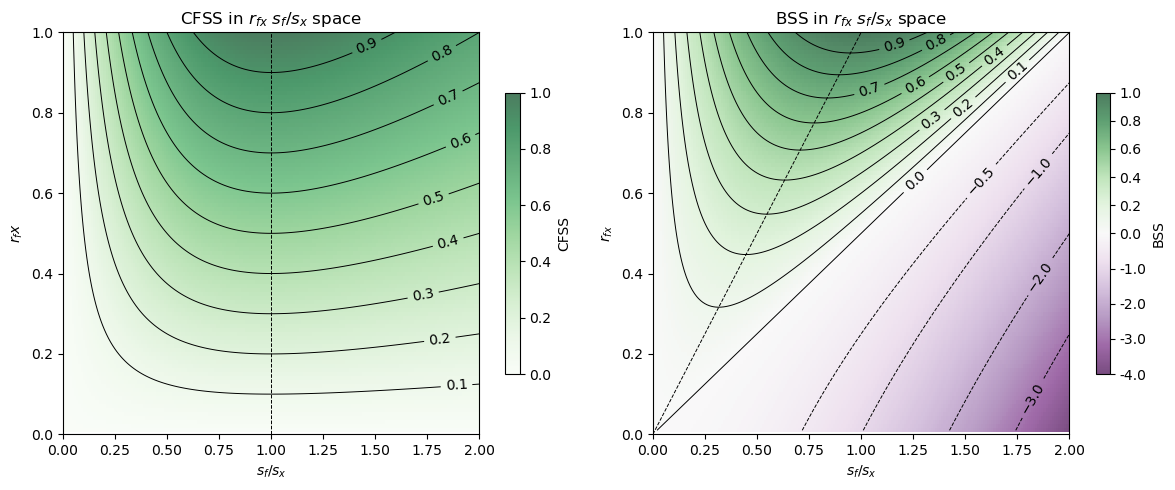

In [8]:
# 2-d space of correlation and normalized sharpness
# display CFSS and BSS in the background

fig, axs = plt.subplots(1, 2,figsize=(12,5))
axs = axs.flat
x1d=np.linspace(0.01,2.0,200)
y1d=np.linspace(0.01,1.0,100)
xx,yy=np.meshgrid(x1d,y1d)


cfss=(2.*yy*xx)/(xx*xx+1.)
sc1=axs[0].pcolormesh(xx,yy,cfss,cmap='Greens',vmin=0.,vmax=1.,alpha=0.7)
cs1=axs[0].contour(xx,yy,cfss,levels=np.linspace(0.0,1.0,11),colors='k',linewidths=0.7)
axs[0].clabel(cs1, cs1.levels, inline=True, fontsize=10)
plt.colorbar(sc1,orientation='vertical',shrink=0.7,label='CFSS',ax=axs[0])
axs[0].set_title(r'CFSS in $r_{fx}$ $s_f/s_x$ space')
axs[0].set_xlabel(r'$s_f/s_x$')
axs[0].set_ylabel(r'$r_fx$')
axs[0].plot([1.,1.],[0.,1.],'k--',lw=0.7)

axs[0].set_ylim(0.,1.)
axs[0].set_xlim(0.,2.)

bss=2.*yy*xx-xx*xx
sc1=axs[1].pcolormesh(xx,yy,bss,cmap='PRGn',alpha=0.7,norm=colors.TwoSlopeNorm(vmin=-4., vcenter=0., vmax=1.))
cs1=axs[1].contour(xx,yy,bss,levels=[-4.,-3.,-2.,-1.,-0.5,0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.],colors='k',linewidths=0.7)
axs[1].clabel(cs1, cs1.levels, inline=True, fontsize=10)
cbar=plt.colorbar(sc1,orientation='vertical',shrink=0.7,label='BSS',ax=axs[1])
ticks=[-4.,-3.,-2.,-1.,0.,0.2,0.4,0.6,0.8,1.]
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(t) for t in ticks])
axs[1].set_title(r'BSS in $r_{fx}$ $s_f/s_x$ space')
axs[1].plot([0.,1.],[0.,1.],'k--',lw=0.7)
axs[1].set_xlabel(r'$s_f/s_x$')
axs[1].set_ylabel(r'$r_{fx}$')
axs[1].set_ylim(0.,1.)
axs[1].set_xlim(0.,2.)

plt.tight_layout()

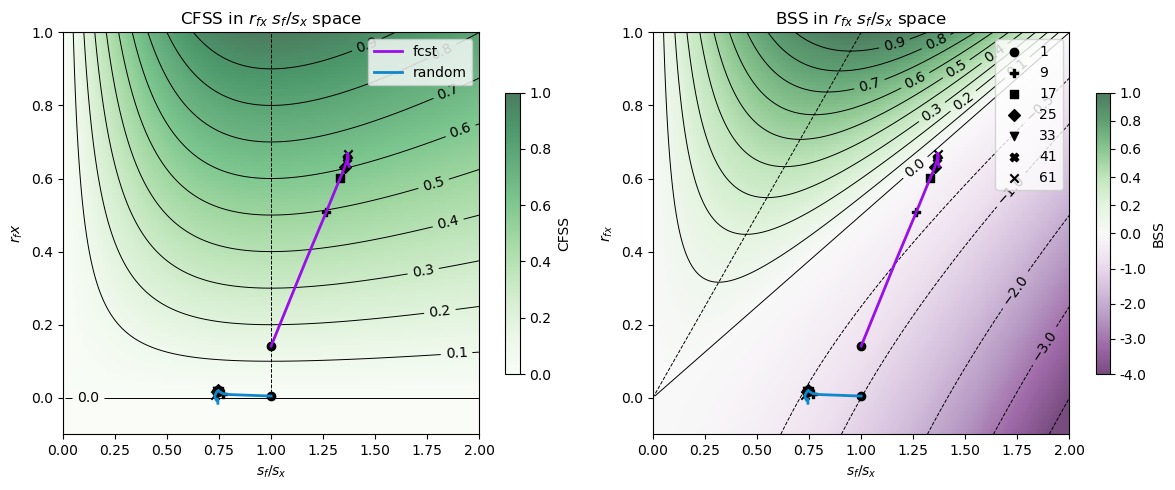

In [20]:

sf_sx=np.sqrt(sf_2)/np.sqrt(sx_2)

fig, axs = plt.subplots(1, 2,figsize=(12,5))
axs = axs.flat
x1d=np.linspace(0.01,2.0,200)
y1d=np.linspace(-0.1,1.0,111)
xx,yy=np.meshgrid(x1d,y1d)


cfss=(2.*yy*xx)/(xx*xx+1.)
sc1=axs[0].pcolormesh(xx,yy,cfss,cmap='Greens',vmin=0.,vmax=1.,alpha=0.7)
cs1=axs[0].contour(xx,yy,cfss,levels=np.linspace(-0.1,1.0,12),colors='k',linewidths=0.7)
axs[0].clabel(cs1, cs1.levels, inline=True, fontsize=10)
plt.colorbar(sc1,orientation='vertical',shrink=0.7,label='CFSS',ax=axs[0])
axs[0].set_title(r'CFSS in $r_{fx}$ $s_f/s_x$ space')
axs[0].set_xlabel(r'$s_f/s_x$')
axs[0].set_ylabel(r'$r_fx$')
axs[0].plot([1.,1.],[0.,1.],'k--',lw=0.7)
axs[0].plot(sf_sx,rfx1,c=colorlist[1],lw=2.,label=r'fcst')
axs[0].plot(np.sqrt(sf_2_rand)/np.sqrt(sx_2_rand),rfx2,c=colorlist[2],lw=2.,label=r'random')
markerlist=['o','P','s','D','v','X','x']
for j in np.arange(7):
    i=j*2
    if j==6:
        i=15
    axs[0].scatter(np.sqrt(sf_2_rand[i])/np.sqrt(sx_2_rand[i]),rfx2[i],c='k',marker=markerlist[j])
    axs[0].scatter(sf_sx[i],rfx1[i],c='k',marker=markerlist[j])

axs[0].legend()
axs[0].set_ylim(-0.1,1.)
axs[0].set_xlim(0.,2.)

bss=2.*yy*xx-xx*xx
sc1=axs[1].pcolormesh(xx,yy,bss,cmap='PRGn',alpha=0.7,norm=colors.TwoSlopeNorm(vmin=-4., vcenter=0., vmax=1.))
cs1=axs[1].contour(xx,yy,bss,levels=[-4.,-3.,-2.,-1.,-0.5,0.,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.],colors='k',linewidths=0.7)
axs[1].clabel(cs1, cs1.levels, inline=True, fontsize=10)
cbar=plt.colorbar(sc1,orientation='vertical',shrink=0.7,label='BSS',ax=axs[1])
ticks=[-4.,-3.,-2.,-1.,0.,0.2,0.4,0.6,0.8,1.]
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(t) for t in ticks])
axs[1].set_title(r'BSS in $r_{fx}$ $s_f/s_x$ space')
axs[1].plot([0.,1.],[0.,1.],'k--',lw=0.7)
axs[1].set_xlabel(r'$s_f/s_x$')
axs[1].set_ylabel(r'$r_{fx}$')
axs[1].set_ylim(-0.1,1.)
axs[1].set_xlim(0.,2.)
axs[1].plot(sf_sx,rfx1,c=colorlist[1],lw=2.)
axs[1].plot(np.sqrt(sf_2_rand)/np.sqrt(sx_2_rand),rfx2,c=colorlist[2],lw=2.)
for j in np.arange(7):
    i=j*2
    if j==6:
        i=15
    axs[1].scatter(np.sqrt(sf_2_rand[i])/np.sqrt(sx_2_rand[i]),rfx2[i],c='k',marker=markerlist[j],label=nwin[i].astype('int'))
    axs[1].scatter(sf_sx[i],rfx1[i],c='k',marker=markerlist[j])

axs[1].legend()
plt.tight_layout()

## Appendix: Grid scale (binary) FSS/CFSS equivalent scores from 2x2 contingency table

At the finest/grid scale the forecasts and observations are binary when calculating FSS (or CFSS). We can use the decompositions of these scores to show that FSS and CFSS can be expressed in terms of commonly-used scores from the 2x2 contingency table. Rewriting these scores in terms of forecast/observation moments:

\begin{equation}
E[x^2]=\frac{1}{N}\sum(x_i)^2=s_x^2+{\bar x}^2
\end{equation}

\begin{equation}
E[f^2]=\frac{1}{N}\sum(f_i)^2=s_f^2+{\bar f}^2
\end{equation}

\begin{equation}
E[fx]=\frac{1}{N}\sum(f_1 x_i)=s_{fx}+\bar f \bar x
\end{equation}

\begin{equation}
FSS=\frac{2\frac{1}{N}\sum(f_i x_i)}{\frac{1}{N}\sum(f_i)^2+\frac{1}{N}\sum(x_i)^2}
=\frac{2E[fx]}{E[f^2]+E[x^2]}=HM(\frac{E[fx]}{E[f^2]},\frac{E[fx]}{E[x^2]})
\end{equation}

\begin{equation}
CFSS=\frac{2\frac{1}{N}\sum{(f_i-\bar f)(x_i-\bar x)}}{\frac{1}{N}\sum(f_i-\bar f)^2+\frac{1}{N}\sum(x_i-\bar x)^2}
=HM(\frac{s_{fx}}{s_f^2},\frac{s_{fx}}{s_x^2})=HM(\frac{E[fx]-\bar f \bar x}{E[f^2]-{\bar f}^2},\frac{E[fx]-\bar f \bar x}{E[x^2]-{\bar x}^2})
\end{equation}

FSS can be written as the harmonic mean of the product moment of the forecasts and observations normalized by the second moments of the forecasts or observations. CFSS can be expressed as the harmonic mean of the covariance of the forecasts and observations normalized by the variances of the forecasts or observations. The elements of the 2x2 contingency table can also be expressed in terms of these moments. Since the forecasts and observations are binary, their second moments are equal to their first moments (means), which are found in the column/row sums of the 2x2 contingency table. The product moment of the forecasts and observations is equal to the “a” element (proportion of correct “yes” forecasts) of the 2x2 contingency table. 

### 2x2 contingency table


| |obs=yes|obs=no|sum|
|:---:|:---:|:---:|:---:|
|fcst=yes|a|b|a+b=$\bar f$|
|fcst=no|c|d|c+d=$1-\bar f$|
| |a+c=$\bar x$|b+d=$1-\bar x$|1|

2x2 contingency table for dichotomous forecasts of observed events, expressed in terms of proportions or relative frequencies. The “a” element of the contingency table provides the proportion of correct “yes” forecasts, often referred to as “true positives” or “hits”. The “b” element provides the proportion of incorrect “yes” forecasts, also known as “false positives” or “false alarms”. The “c” element provides the proportion of incorrect “no” forecasts, also denoted as “false negatives” or “missed events”. The “d” element provides the proportion of correct “no” forecasts, also called “true negatives” or “correct nulls”. 

\begin{equation}
E[x^2]=\frac{1}{N}\sum(x_i)^2=\frac{1}{N}\sum x_i=a+c
\end{equation}

\begin{equation}
E[f^2]=\frac{1}{N}\sum(f_i)^2=\frac{1}{N}\sum f_i=a+b
\end{equation}

\begin{equation}
E[fx]=\frac{1}{N}\sum(f_1 x_i)=a
\end{equation}

### common scores from the 2x2 contingency table

#### probability of detection (POD)
$POD=\frac{a}{a+c}$
#### success ratio (SR)
$SR=\frac{a}{a+b}$
#### probability of false detection (POFD)
$POFD=\frac{b}{b+d}$
#### miss ratio (MR)
$MR=\frac{c}{c+d}$
#### Peirce skill score (PSS)
$PSS=POD-POFD=\frac{a}{a+c}-\frac{b}{b+d}$
#### Clayton skill score (CSS)
$CSS=SR-MR=\frac{a}{a+b}-\frac{c}{c+d}$

### FSS for binary forecast = F1 score

For binary forecasts (grid scale), we find that FSS is the harmonic mean of success ratio (SR) and probability of detection (POD). The harmonic mean of POD and SR (recall and precision) is more commonly known as the F measure, F1 score, or Sorensen-Dice coefficient (Brooks et al. 2025)

\begin{equation}
FSS=\frac{2E[fx]}{E[f^2]+E[x^2]}=\frac{2a}{2a+b+c}=HM(\frac{a}{a+b},\frac{a}{a+c})
=HM(SR,POD)=F1
\end{equation}

Note the similarity to the critical success index (CSI) which was originally derived as the “ratio of verification” by Gilbert (1884).

\begin{equation}
CSI=\frac{a}{a+b+c}
\end{equation}

\begin{equation}
F1=\frac{2(CSI)}{CSI+1}
\end{equation}

At the grid scale, when binary forecasts are unbiased ($\bar f=\bar x$, such as when consistent percentile thresholds are used) the success ratio is equal to the probability of detection, therefore FSS=POD:
\begin{equation}
FSS_{\bar f=\bar x}=POD
\end{equation}

### CFSS for binary forecast = harmonic mean of Peirce and Clayton skill scores

We also find that the binary version of CFSS is the harmonic mean of two skill scores from the 2x2 contingency table, the Clayton skill score (CSS, Clayton 1888) and the Peirce skill score (PSS, Peirce 1885). To the authors’ knowledge, this score has not been used in weather forecast evaluation, but according to Brusco et al. (2021) is equivalent to a score derived by Maxwell and Pilliner (1968).

\begin{equation}
CFSS=HM(\frac{E[fx]-\bar f \bar x}{E[f^2]-{\bar f}^2},\frac{E[fx]-\bar f \bar x}{E[x^2]-{\bar x}^2})
=HM(\frac{ad-bc}{(a+b)(c+d)},\frac{ad-bc}{(a+c)(b+d)})=HM(CSS,PSS)
\end{equation}
\begin{equation}
CFSS=\frac{2(ad-bc)}{(a+b)(c+d)+(a+c)(b+d)}
\end{equation}

At the grid scale, when binary forecasts are unbiased ($\bar f=\bar x$, such as when consistent percentile thresholds are used) the CSS and PSS are equivalent, therefore CFSS=PSS:
\begin{equation}
CFSS_{\bar f=\bar x}=PSS=POD-POFD
\end{equation}

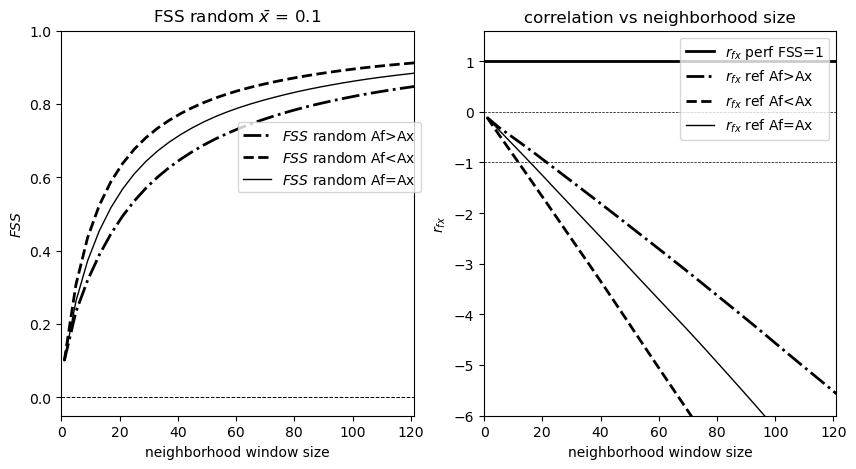

In [99]:
# CFSS on the left subplot, correlation and normalized sharpness on the right subplot

s_x_2_0=np.var(obs1)
xbar0=np.mean(obs1)
a_n_obs=sx_2*nwin/s_x_2_0
a_n_fcst=sf_2*nwin/s_x_2_0
oddsx=(1.-xbar0)/xbar0

sf_sx=np.sqrt(sf_2)/np.sqrt(sx_2)

fss_skill_c=(sf_sx*sx_2)/(0.5*(sf_sx*sf_sx+1.)*sx_2+xbar0*xbar0)
fss_rand_c=(xbar0*xbar0)/(0.5*(sf_sx*sf_sx+1.)*sx_2+xbar0*xbar0)

rfx_ref=-1.*fbar_1*xbar_1/np.sqrt(sx_2)/np.sqrt(sf_2)
rfx_ref_rand=-1.*fbar_1*xbar_1/np.sqrt(sx_2_rand)/np.sqrt(sf_2_rand)
rfx_ref_eq=-1.*xbar_1*xbar_1/np.sqrt(sx_2)/np.sqrt(sx_2)

fig,ax = plt.subplots(1,2,figsize=(10,5))
axs=ax.flat
axs[0].plot(nwin,rfx_ref/(rfx_ref-1.),c='k',lw=2.,ls='-.',label=r'$FSS$ random Af>Ax')
axs[0].plot(nwin,rfx_ref_rand/(rfx_ref_rand-1.),c='k',lw=2.,ls='--',label=r'$FSS$ random Af<Ax')
axs[0].plot(nwin,rfx_ref_eq/(rfx_ref_eq-1.),c='k',lw=1.,label=r'$FSS$ random Af=Ax')
axs[0].plot([0.,400.],[0.,0.],c='k',ls='--',lw=0.7)
#axs[0].plot([21.,21.],[-0.05,1.],c='k',ls='--',lw=0.7)
axs[0].legend(loc=[0.5,0.58])
axs[0].set_xlabel('neighborhood window size')
axs[0].set_ylabel(r'$FSS$')
axs[0].set_title(r'FSS random $\bar x$ ='+f' {np.round(xbar0,2)}')
axs[0].set_xlim(0.,121.)
axs[0].set_ylim(-0.05,1.)
# axs[1].plot(nwin,a_n_obs,c=colorlist[0],lw=2.,label=r'${A_{nx}}$ obs')

# axs[1].plot([0.,400.],[0.,0.],c='k',ls='--',lw=0.5)
# axs[1].legend(loc=[0.55,0.6])
# axs[1].set_xlabel('neighborhood window size')
# axs[1].set_ylabel(r'$A_{nx}$')
# axs[1].set_title(r'autocorrelation factor vs neighb size')
# axs[1].set_xlim(0.,121.)


# axs[1].plot(nwin,rfx1,c=colorlist[1],lw=2.,label=r'$r_{fx}$ fcst')
# axs[1].plot(nwin,rfx2,c=colorlist[2],lw=2.,label=r'$r_{fx}$ random')
axs[1].plot([0.,400.],[1.,1.],c='k',lw=2.,label=r'$r_{fx}$ perf FSS=1')
axs[1].plot(nwin,rfx_ref,c='k',lw=2.,ls='-.',label=r'$r_{fx}$ ref Af>Ax')
axs[1].plot(nwin,rfx_ref_rand,c='k',lw=2.,ls='--',label=r'$r_{fx}$ ref Af<Ax')
axs[1].plot(nwin,rfx_ref_eq,c='k',lw=1.,label=r'$r_{fx}$ ref Af=Ax')
axs[1].set_xlabel('neighborhood window size')
axs[1].set_ylabel(r'$r_{fx}$')
axs[1].set_title(r'correlation vs neighborhood size')
axs[1].plot([0.,400.],[-1.,-1.],c='k',ls='--',lw=0.5)
axs[1].plot([0.,400.],[0.,0.],c='k',ls='--',lw=0.5)

#axs[1].plot([21.,21.],[0.5,-6.],c='k',ls='--',lw=0.7)
axs[1].set_xlim(0.,121.)
axs[1].set_ylim(-6.,1.6)
axs[1].legend()

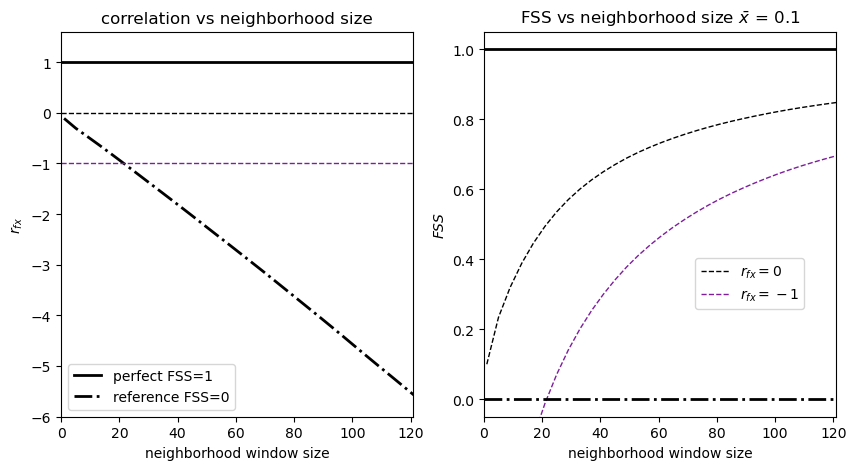

(0.0, 1.0)

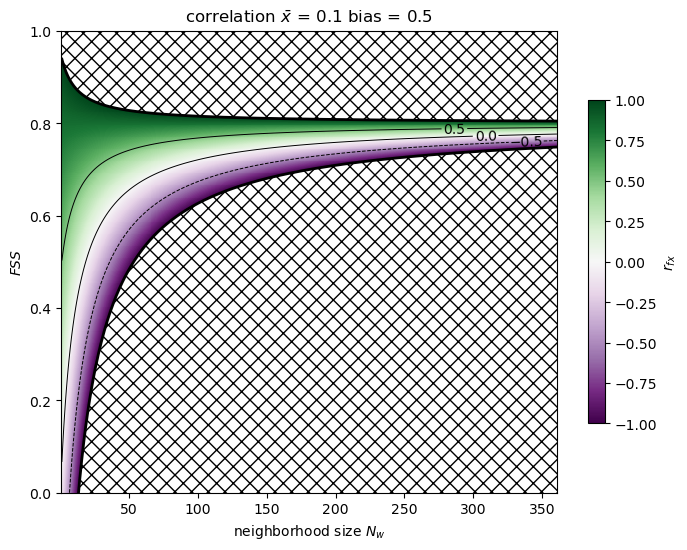

In [228]:
xbar1=0.1
xodds=xbar1/(1.-xbar1)
anx1=1.
anf1=1.
b1=0.5
nw1=np.linspace(1.0,361.0,501)
fss1=np.linspace(0.0,1.0,501)
fig, axs = plt.subplots(figsize=(8,6))

nw2,fss2=np.meshgrid(nw1,fss1)
sf2=b1*xbar1*(1.-b1*xbar1)*anf1/nw2
sx2=xbar1*(1.-xbar1)*anx1/nw2
sf1=b1*xbar1*(1.-b1*xbar1)*anf1/nw1
sx1=xbar1*(1.-xbar1)*anx1/nw1
fsstop=(b1*xbar1*xbar1+np.sqrt(sf1)*np.sqrt(sx1))/(0.5*(sf1+sx1)+0.5*(b1*b1+1.)*xbar1*xbar1)
fssbot=(b1*xbar1*xbar1-np.sqrt(sf1)*np.sqrt(sx1))/(0.5*(sf1+sx1)+0.5*(b1*b1+1.)*xbar1*xbar1)

term1=((0.5*(sf2+sx2)+0.5*(b1*b1+1.)*xbar1*xbar1)*fss2-b1*xbar1*xbar1)/np.sqrt(sf2)/np.sqrt(sx2)
#term1=fss2+xodds*nw2/an1*(fss2-1.)
term1[term1<-1.]=np.nan
term1[term1>1.]=np.nan


sc1=axs.pcolormesh(nw2,fss2,term1,cmap='PRGn',vmin=-1.,vmax=1.)
cs1=axs.contour(nw2,fss2,term1,colors='k',levels=[-0.5,0.,0.5],linewidths=0.7)
axs.clabel(cs1, cs1.levels, inline=True, fontsize=10)
plt.colorbar(sc1,orientation='vertical',shrink=0.7,label=r'$r_{fx}$',ax=axs)
axs.plot(nw1,fsstop,'k',lw=2.)
axs.plot(nw1,fssbot,'k',lw=2.)
axs.set_title(r'correlation $\bar x$'+f' = {xbar1} bias = {b1}')
axs.set_xlabel(r'neighborhood size $N_w$')
axs.set_ylabel(r'$FSS$')
xmin, xmax = axs.get_xlim()
ymin, ymax = axs.get_ylim()
xy = (xmin+0.001,ymin+0.001)
width = xmax - xmin - 0.002
height = ymax - ymin - 0.002
# create the patch and place it in the back of countourf (zorder!)
p = patches.Rectangle(xy, width, height, hatch='xx', linewidth=0,fill=None, zorder=-10)
axs.add_patch(p)
axs.set_ylim(0.,1.)
#axs.plot([1.,1.],[0.,1.],'k--',lw=0.7)


In [149]:
fssbot

array([-8.57672852e-01, -8.50162630e-01, -8.42720153e-01, -8.35344507e-01,
       -8.28034798e-01, -8.20790143e-01, -8.13609680e-01, -8.06492558e-01,
       -7.99437943e-01, -7.92445016e-01, -7.85512970e-01, -7.78641014e-01,
       -7.71828370e-01, -7.65074273e-01, -7.58377972e-01, -7.51738729e-01,
       -7.45155817e-01, -7.38628521e-01, -7.32156142e-01, -7.25737987e-01,
       -7.19373379e-01, -7.13061650e-01, -7.06802144e-01, -7.00594216e-01,
       -6.94437230e-01, -6.88330563e-01, -6.82273599e-01, -6.76265735e-01,
       -6.70306376e-01, -6.64394936e-01, -6.58530841e-01, -6.52713523e-01,
       -6.46942426e-01, -6.41216999e-01, -6.35536705e-01, -6.29901010e-01,
       -6.24309392e-01, -6.18761335e-01, -6.13256333e-01, -6.07793887e-01,
       -6.02373504e-01, -5.96994701e-01, -5.91657001e-01, -5.86359934e-01,
       -5.81103040e-01, -5.75885861e-01, -5.70707951e-01, -5.65568867e-01,
       -5.60468174e-01, -5.55405443e-01, -5.50380253e-01, -5.45392188e-01,
       -5.40440836e-01, -

/tmp/ipykernel_1699216/1819938667.py:3: RuntimeWarning: divide by zero encountered in divide
  term1=np.sqrt(b1*xbar1*xbar1/(1.-b1*xbar1)/(1.-xbar1))


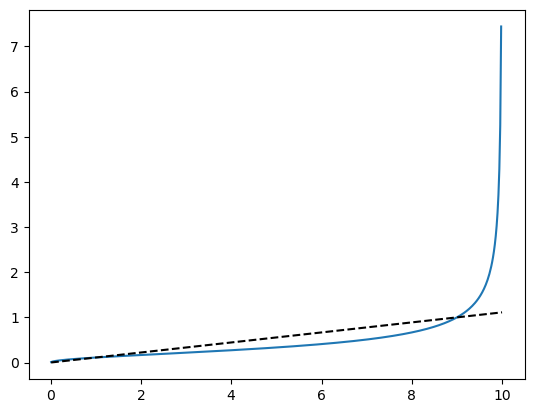

In [110]:
xbar1=0.1
b1=np.linspace(0.01,10.0,500)
term1=np.sqrt(b1*xbar1*xbar1/(1.-b1*xbar1)/(1.-xbar1))
term2=b1*xbar1/(1.-xbar1)
plt.plot(b1,term1)
plt.plot(b1,term2,'k--')

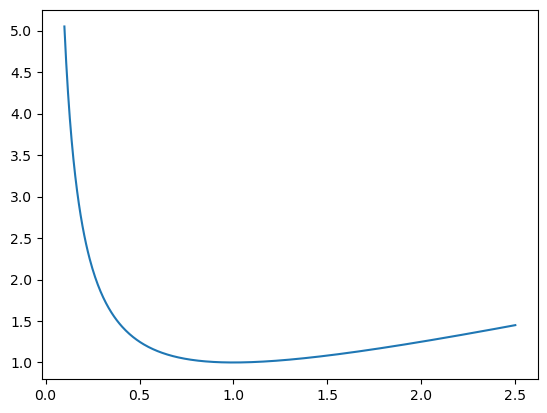

In [5]:
s1=np.linspace(0.1,2.5,500)
term1=(s1*s1+1.)/(2.*s1)

plt.plot(s1,term1)
#plt.plot(b1,term2,'k--')

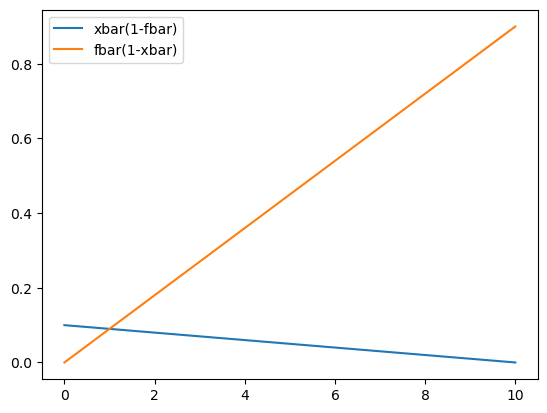

In [15]:
xbar1=0.1

fbar1=np.linspace(0.,1.,500)
term1=xbar1*(1.-fbar1)
term2=fbar1*(1.-xbar1)

plt.plot(fbar1/xbar1,term1,label='xbar(1-fbar)')
plt.plot(fbar1/xbar1,term2,label='fbar(1-xbar)')
plt.legend()

#plt.plot(b1,term2,'k--')

Text(0, 0.5, '$A_B$')

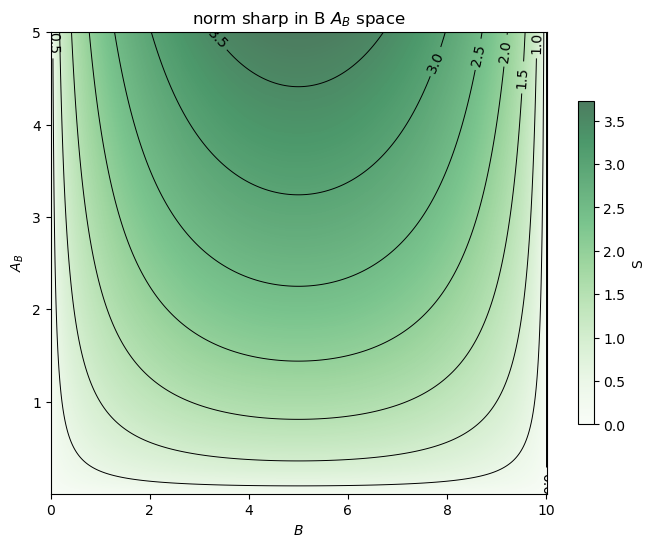

In [118]:
xbar1=0.1
b1=np.linspace(0.01,10.0,500)
a1=np.linspace(0.01,5.0,500)
fig, axs = plt.subplots(figsize=(8,6))

bb,aa=np.meshgrid(b1,a1)
term1=np.sqrt(aa*bb*xbar1*(1.-bb*xbar1)/xbar1/(1.-xbar1))


sc1=axs.pcolormesh(bb,aa,term1,cmap='Greens',alpha=0.7)
cs1=axs.contour(bb,aa,term1,colors='k',linewidths=0.7)
axs.clabel(cs1, cs1.levels, inline=True, fontsize=10)
plt.colorbar(sc1,orientation='vertical',shrink=0.7,label='S',ax=axs)
axs.set_title(r'norm sharp in B $A_B$ space')
axs.set_xlabel(r'$B$')
axs.set_ylabel(r'$A_B$')
#axs.plot([1.,1.],[0.,1.],'k--',lw=0.7)


In [119]:
7./(3.5*3.5+1)

0.5283018867924528

Text(0, 0.5, '$A_B$')

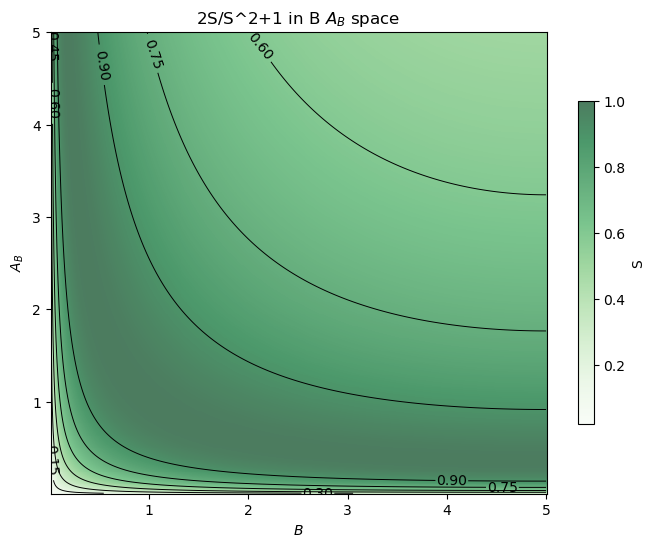

In [121]:
xbar1=0.1
b1=np.linspace(0.01,5.0,500)
a1=np.linspace(0.01,5.0,500)
fig, axs = plt.subplots(figsize=(8,6))

bb,aa=np.meshgrid(b1,a1)
term1=np.sqrt(aa*bb*xbar1*(1.-bb*xbar1)/xbar1/(1.-xbar1))


sc1=axs.pcolormesh(bb,aa,2.*term1/(term1*term1+1.),cmap='Greens',alpha=0.7)
cs1=axs.contour(bb,aa,2.*term1/(term1*term1+1.),colors='k',linewidths=0.7)
axs.clabel(cs1, cs1.levels, inline=True, fontsize=10)
plt.colorbar(sc1,orientation='vertical',shrink=0.7,label='S',ax=axs)
axs.set_title(r'2S/S^2+1 in B $A_B$ space')
axs.set_xlabel(r'$B$')
axs.set_ylabel(r'$A_B$')
#axs.plot([1.,1.],[0.,1.],'k--',lw=0.7)


In [128]:
(2.*np.arange(15)+1.)**2.

array([  1.,   9.,  25.,  49.,  81., 121., 169., 225., 289., 361., 441.,
       529., 625., 729., 841.])

Text(0, 0.5, '$FSS$')

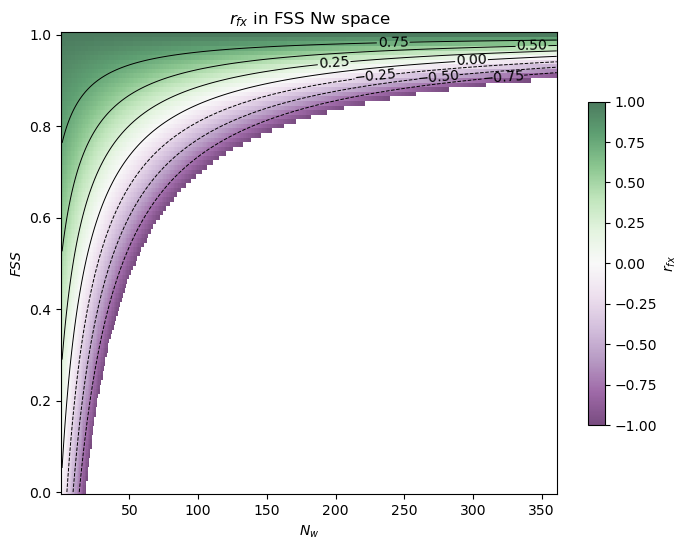

In [129]:
xbar1=0.1
xodds=xbar1/(1.-xbar1)
an1=2.
nw1=np.arange(361)+1.
fss1=np.linspace(0.0,1.0,101)
fig, axs = plt.subplots(figsize=(8,6))

nw2,fss2=np.meshgrid(nw1,fss1)

term1=fss2+xodds*nw2/an1*(fss2-1.)
term1[term1<-1.]=np.nan


sc1=axs.pcolormesh(nw2,fss2,term1,cmap='PRGn',vmin=-1.,vmax=1.,alpha=0.7)
cs1=axs.contour(nw2,fss2,term1,colors='k',linewidths=0.7)
axs.clabel(cs1, cs1.levels, inline=True, fontsize=10)
plt.colorbar(sc1,orientation='vertical',shrink=0.7,label=r'$r_{fx}$',ax=axs)
axs.set_title(r'$r_{fx}$ in FSS Nw space')
axs.set_xlabel(r'$N_w$')
axs.set_ylabel(r'$FSS$')
#axs.plot([1.,1.],[0.,1.],'k--',lw=0.7)


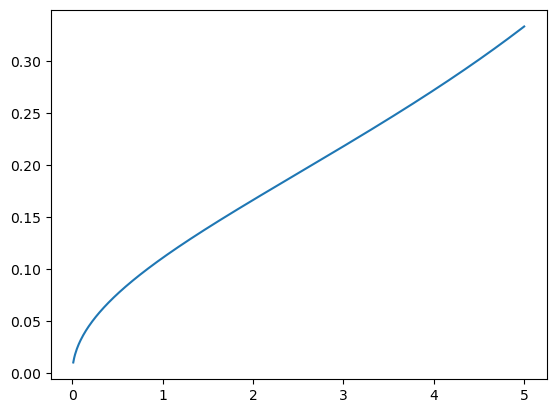

In [225]:
s1=np.linspace(0.01,5.0,500)
xbar1=0.1
plt.plot(s1,np.sqrt(s1*xbar1*xbar1/(1.-s1*xbar1)/(1.-xbar1)))
#plt.plot(s1,s1,'k--')

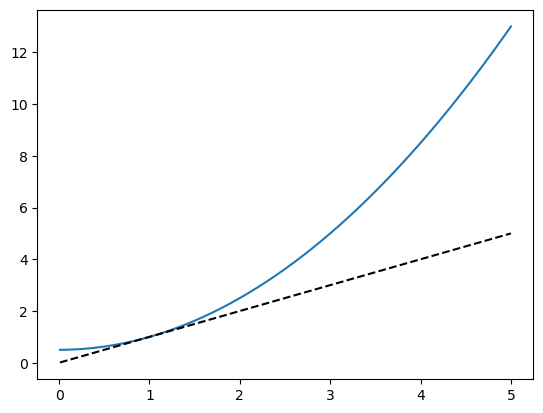

In [31]:
s1=np.linspace(0.01,5.0,500)
plt.plot(s1,0.5*(s1*s1+1.0))
plt.plot(s1,s1,'k--')

In [32]:
np.sqrt(a_n_obs*a_n_fcst)

array([1.        , 1.82277916, 2.13142978, 2.27463609, 2.34761677,
       2.38721283, 2.41031846, 2.42680805, 2.4391661 , 2.44854938,
       2.45561571, 2.45924141, 2.45980108, 2.4609403 , 2.46271996,
       2.46291588, 2.46257768, 2.46159271, 2.45890521, 2.45542021,
       2.45228848, 2.44916361, 2.44616815, 2.44229029, 2.43742916,
       2.43199783, 2.42739095, 2.42394608, 2.42148995, 2.41883453,
       2.41580947, 2.41331092, 2.41013737, 2.40676265, 2.40325042,
       2.40041325, 2.3976547 , 2.39564979, 2.3941516 , 2.39344195,
       2.3929843 , 2.39240973, 2.39139131, 2.3894405 , 2.38766071,
       2.38628128, 2.38551754, 2.3855325 , 2.38573541, 2.38604407,
       2.38649405, 2.38722348, 2.3881064 , 2.38923436, 2.39027774,
       2.39110332, 2.39156857, 2.39240298, 2.39340509, 2.39421068,
       2.39527796, 2.39638735, 2.39734057, 2.39836467, 2.39971635,
       2.40108032, 2.40221821, 2.40314587, 2.40407482, 2.40464734,
       2.40535725, 2.40637197, 2.40742606, 2.40854725, 2.40993

In [77]:
1.3*9.

11.700000000000001

In [76]:
np.sqrt(a_n_obs*a_n_rand)

array([1.        , 1.24969633, 1.29536688, 1.31431261, 1.32186654,
       1.32569033, 1.32759618, 1.32806495, 1.32922361, 1.33009272,
       1.32871809, 1.32648547, 1.32385076, 1.32131454, 1.31925965,
       1.31785977, 1.31755863, 1.31727604, 1.316014  , 1.31396954,
       1.31211192, 1.31024745, 1.30812361, 1.30559925, 1.30288487,
       1.30033953, 1.29836967, 1.29704325, 1.29613551, 1.29536215,
       1.2949305 , 1.29460594, 1.29400972, 1.2932285 , 1.29257443,
       1.29213971, 1.29142054, 1.29075238, 1.29026152, 1.29048232,
       1.29061274, 1.29092238, 1.29103692, 1.29063799, 1.29019136,
       1.28992528, 1.28977812, 1.28993644, 1.29012823, 1.29035034,
       1.29078506, 1.2915236 , 1.29245894, 1.2936782 , 1.29497871,
       1.29620092, 1.29722626, 1.2982409 , 1.29931851, 1.30027095,
       1.30104071, 1.30168084, 1.30224918, 1.30271602, 1.30311266,
       1.30341889, 1.30356122, 1.30371509, 1.30388221, 1.30381676,
       1.30386524, 1.3040068 , 1.30415441, 1.30445254, 1.30488

In [74]:
nwin

array([  1.,   5.,   9.,  13.,  17.,  21.,  25.,  29.,  33.,  37.,  41.,
        45.,  49.,  53.,  57.,  61.,  65.,  69.,  73.,  77.,  81.,  85.,
        89.,  93.,  97., 101., 105., 109., 113., 117., 121., 125., 129.,
       133., 137., 141., 145., 149., 153., 157., 161., 165., 169., 173.,
       177., 181., 185., 189., 193., 197., 201., 205., 209., 213., 217.,
       221., 225., 229., 233., 237., 241., 245., 249., 253., 257., 261.,
       265., 269., 273., 277., 281., 285., 289., 293., 297.])

In [75]:
2.4*9.

21.599999999999998

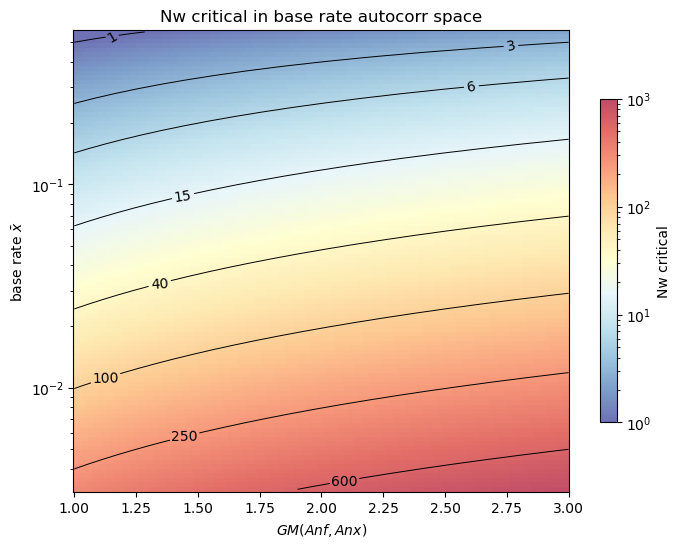

In [71]:
# Nw critical

fig, axs = plt.subplots(figsize=(8,6))

x1d=np.linspace(1.0,3.0,301)
y1d=np.logspace(-2.5,-0.25,101)
xx,yy=np.meshgrid(x1d,y1d)


nwcrit=(1.-yy)*xx/yy
sc1=axs.pcolormesh(xx,yy,nwcrit,cmap='RdYlBu_r',norm=colors.LogNorm(vmin=1.,vmax=1000.),alpha=0.7)
cs1=axs.contour(xx,yy,nwcrit,levels=[1.,3.,6.,15.,40.,100.,250.,600.],colors='k',linewidths=0.7)
axs.clabel(cs1, cs1.levels, inline=True, fontsize=10)
plt.colorbar(sc1,orientation='vertical',shrink=0.7,label='Nw critical',ax=axs)
axs.set_title('Nw critical in base rate autocorr space')
axs.set_xlabel(r'$GM(Anf,Anx)$')
axs.set_ylabel(r'base rate $\bar x$')
axs.set_yscale('log')



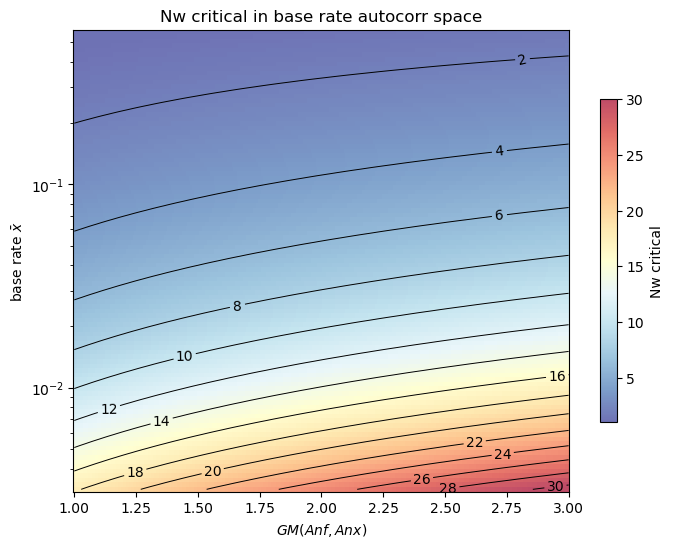

In [70]:
# Nw critical

fig, axs = plt.subplots(figsize=(8,6))

x1d=np.linspace(1.0,3.0,301)
y1d=np.logspace(-2.5,-0.25,101)
xx,yy=np.meshgrid(x1d,y1d)


nwcrit=(1.-yy)*xx/yy
sc1=axs.pcolormesh(xx,yy,np.sqrt(nwcrit),cmap='RdYlBu_r',vmin=1.,vmax=30.,alpha=0.7)
cs1=axs.contour(xx,yy,np.sqrt(nwcrit),levels=np.linspace(2.,30.,15),colors='k',linewidths=0.7)
axs.clabel(cs1, cs1.levels, inline=True, fontsize=10)
plt.colorbar(sc1,orientation='vertical',shrink=0.7,label='Nw critical',ax=axs)
axs.set_title('Nw critical in base rate autocorr space')
axs.set_xlabel(r'$GM(Anf,Anx)$')
axs.set_ylabel(r'base rate $\bar x$')
axs.set_yscale('log')



Text(0.5, 1.0, 'stats vs neighborhood size $\\bar x$ = 0.1')

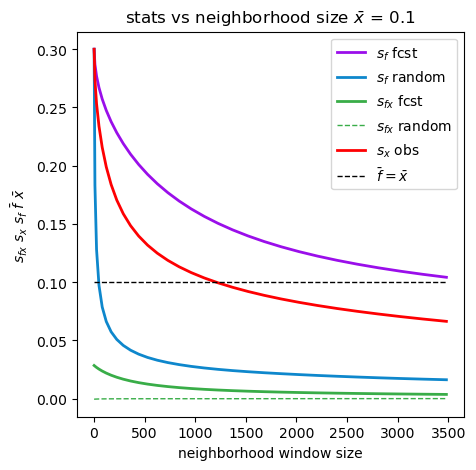

In [325]:
# compare the stats
xbar=np.mean(obs1)

fig,axs = plt.subplots(figsize=(5,5))

axs.plot(nwin,np.sqrt(sf_2),c=colorlist[1],lw=2.,label=r'$s_f$ fcst')
axs.plot(nwin,np.sqrt(sf_2_rand),c=colorlist[2],lw=2.,label=r'$s_f$ random')
axs.plot(nwin,sf_x,c=colorlist[3],lw=2.,label=r'$s_{fx}$ fcst')
axs.plot(nwin,sf_x_rand,c=colorlist[3],lw=1.,ls='--',label=r'$s_{fx}$ random')
axs.plot(nwin,np.sqrt(sx_2),c=colorlist[0],lw=2.,label=r'$s_x$ obs')
axs.plot(nwin,xbar_1,c='k',lw=1.,ls='--',label=r'$\bar f = \bar x$')
#axs.plot([0.,400.],[0.,0.],c='k',ls='--',lw=0.7)
axs.legend(loc='upper right')
axs.set_xlabel('neighborhood window size')
axs.set_ylabel(r'$s_{fx}$ $s_x$ $s_f$ $\bar f$ $\bar x$')
axs.set_title(r'stats vs neighborhood size $\bar x$ ='+f' {np.round(xbar,2)}')
#axs.set_xlim(0.,121.)



In [238]:
import pandas as pd
#df_fss=pd.read_csv('/users/baldwin/datasets/hrrr_cref_sfe.csv')
#df_fss=pd.read_csv('/users/baldwin/datasets/hrrr_cref_fss_stuff.csv')
#df_fss=pd.read_csv('/users/baldwin/datasets/hrrr_cref_sfe.csv')
#df_fss=pd.read_csv('/users/baldwin/datasets/hrrr_cref_fss_stuff.csv')
df_fss=pd.read_csv('/users/baldwin/datasets/hrrr_cref_fss_example.csv')

df_fss['scale']=np.sqrt(df_fss.win)*3.
df_fss['S2']=df_fss.sf2/df_fss.sx2
df_fss['rho']=df_fss.sfx/np.sqrt(df_fss.sx2)/np.sqrt(df_fss.sf2)
df_fss['POD']=(df_fss.sfx+df_fss.xbar*df_fss.fbar)/(df_fss.sx2+df_fss.xbar*df_fss.xbar)
df_fss['FSS']=2.*df_fss.efx/(df_fss.ex2+df_fss.ef2)
#df_fss

df_fss_rrfs=pd.read_csv('/users/baldwin/datasets/rrfs_cref_fss_example.csv')

df_fss_rrfs['scale']=np.sqrt(df_fss_rrfs.win)*3.
df_fss_rrfs['S2']=df_fss_rrfs.sf2/df_fss_rrfs.sx2
df_fss_rrfs['rho']=df_fss_rrfs.sfx/np.sqrt(df_fss_rrfs.sx2)/np.sqrt(df_fss_rrfs.sf2)
df_fss_rrfs['POD']=(df_fss_rrfs.sfx+df_fss_rrfs.xbar*df_fss_rrfs.fbar)/(df_fss_rrfs.sx2+df_fss_rrfs.xbar*df_fss_rrfs.xbar)
df_fss_rrfs['FSS']=2.*df_fss_rrfs.efx/(df_fss_rrfs.ex2+df_fss_rrfs.ef2)

df_fss_rrfs

,Unnamed: 0,thresh,win,xbar,fbar,sx2,sf2,sfx,ex2,ef2,efx,mse,scale,S2,rho,POD,FSS
0,0,10.0,1.0,0.296051,0.296387,0.208405,0.208542,0.068026,0.296051,0.296387,0.155771,0.280895,3.0,1.000658,0.326304,0.526165,0.525866
1,1,10.0,9.0,0.296051,0.296387,0.191374,0.191007,0.067987,0.279020,0.278852,0.155733,0.246406,9.0,0.998081,0.355601,0.558143,0.558311
2,2,10.0,81.0,0.296051,0.296387,0.167808,0.171807,0.068054,0.255454,0.259653,0.155800,0.203508,27.0,1.023831,0.400798,0.609893,0.604922
3,3,10.0,441.0,0.296051,0.296387,0.140732,0.149957,0.068301,0.228378,0.237803,0.156047,0.154087,63.0,1.065556,0.470163,0.683284,0.669470
4,4,10.0,1681.0,0.296051,0.296387,0.113576,0.125328,0.067622,0.201222,0.213174,0.155368,0.103659,123.0,1.103478,0.566792,0.772124,0.749854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,65,40.0,3721.0,0.019778,0.019829,0.001415,0.001236,0.000621,0.001807,0.001629,0.001013,0.001410,183.0,0.873213,0.469275,0.560652,0.589607
66,66,40.0,6561.0,0.019778,0.019829,0.001019,0.000855,0.000549,0.001410,0.001249,0.000941,0.000777,243.0,0.839288,0.587989,0.667328,0.707933
67,67,40.0,10201.0,0.019778,0.019829,0.000781,0.000660,0.000490,0.001172,0.001053,0.000882,0.000461,303.0,0.845565,0.682499,0.752771,0.792876
68,68,40.0,14641.0,0.019778,0.019829,0.000623,0.000534,0.000438,0.001014,0.000927,0.000830,0.000281,363.0,0.857664,0.759574,0.818863,0.855401


<Axes: xlabel='win', ylabel='FSS'>

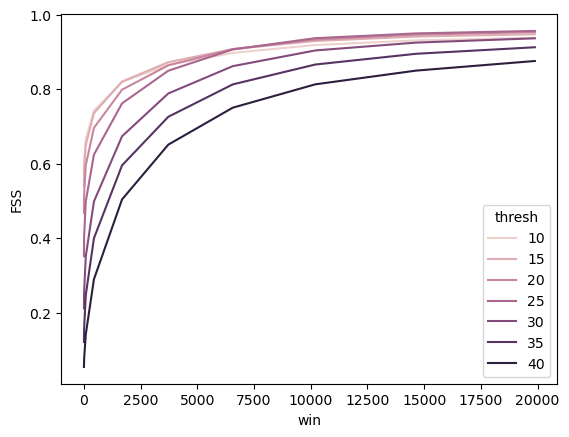

In [240]:
import seaborn as sns

sns.lineplot(data=df_fss,x='win',y='FSS',hue='thresh')

In [264]:
df_fss.groupby('thresh').mean()

,Unnamed: 0,win,xbar,fbar,sx2,sf2,sfx,ex2,ef2,efx,mse,scale,S2,rho,POD,FSS
thresh,,,,,,,,,,,,,,,,
10.0,4.5,5721.8,0.296051,0.296210,0.116931,0.115302,0.067503,0.204577,0.203042,0.155196,0.097227,174.0,0.993369,0.656439,0.794502,0.796241
15.0,14.5,5721.8,0.223994,0.224171,0.096960,0.092695,0.058128,0.147133,0.142948,0.108341,0.073399,174.0,0.948434,0.696968,0.780559,0.793190
20.0,24.5,5721.8,0.144952,0.145238,0.064753,0.060707,0.037220,0.085764,0.081801,0.058273,0.051020,174.0,0.920877,0.702015,0.746779,0.768454
25.0,34.5,5721.8,0.080717,0.080832,0.031670,0.032088,0.016328,0.038185,0.038622,0.022853,0.031102,174.0,1.011577,0.675460,0.728225,0.724683
30.0,44.5,5721.8,0.047689,0.047752,0.015855,0.017450,0.006084,0.018129,0.019730,0.008361,0.021136,174.0,1.171675,0.593673,0.687633,0.641258
35.0,54.5,5721.8,0.031530,0.031663,0.009395,0.010354,0.002496,0.010389,0.011356,0.003494,0.014757,174.0,1.228782,0.523804,0.632598,0.573920
40.0,64.5,5721.8,0.019778,0.019829,0.005264,0.005705,0.000806,0.005656,0.006098,0.001198,0.009357,174.0,1.262927,0.444781,0.563271,0.501024


(0.0, 121.0)

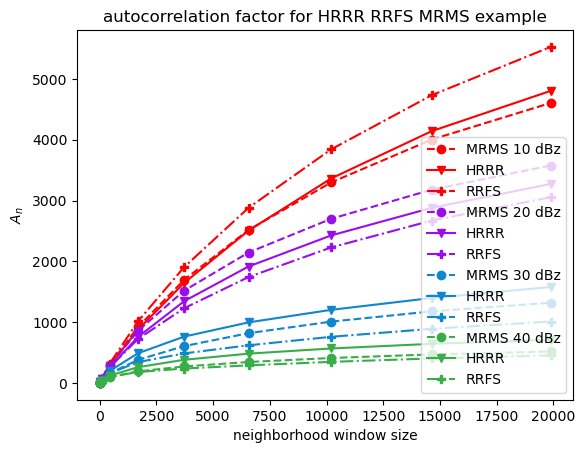

In [315]:
# autocorrelation factor in HRRR RRFS MRMS
fig,ax=plt.subplots()
for i in np.arange(4):
    thresh=10.+i*10.
    df_sub=df_fss[df_fss.thresh==thresh]
    df_subr=df_fss_rrfs[df_fss_rrfs.thresh==thresh]
    xbar1=df_sub.xbar.iloc[0]
    fbar1=df_sub.fbar.iloc[0]
    s_x_2_0=df_sub.sx2.iloc[0]
    a_n_obs=df_sub.sx2*df_sub.win/s_x_2_0
    a_n_hrrr=df_sub.sf2*df_sub.win/s_x_2_0
    s_x_2_r=df_subr.sx2.iloc[0]
    a_n_rrfs=df_subr.sf2*df_subr.win/s_x_2_r
    ax.plot(df_sub.win,a_n_obs,c=colorlist[i],marker='o',ls='--',label=f'MRMS {int(thresh)} dBz')
    ax.plot(df_sub.win,a_n_hrrr,c=colorlist[i],marker='v',label='HRRR')
    ax.plot(df_sub.win,a_n_rrfs,c=colorlist[i],ls='-.',marker='P',label='RRFS')
#ax.plot(df_fss.scale,df_fss.sfx,c=colorlist[2],marker='o',label=r'$s_{fx}$')

#ax.set_xscale('log')
#ax.set_yscale('log')

ax.legend(loc='lower right')
ax.set_xlabel('neighborhood window size')
ax.set_ylabel(r'$A_n$')
ax.set_title(r'autocorrelation factor for HRRR RRFS MRMS example')

axs[1].set_xlim(0.,121.)


(-1.05, 0.05)

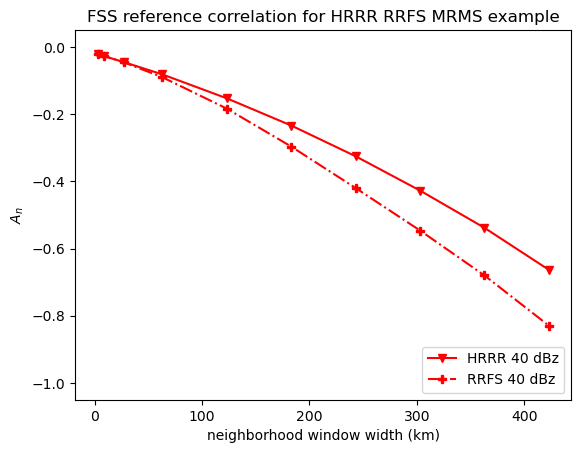

In [468]:
# autocorrelation factor in HRRR RRFS MRMS
fig,ax=plt.subplots()
for i in np.arange(1):
    thresh=40.+i*10.
    df_sub=df_fss[df_fss.thresh==thresh]
    df_subr=df_fss_rrfs[df_fss_rrfs.thresh==thresh]
    xbar1=df_sub.xbar.iloc[0]
    fbar1=df_sub.fbar.iloc[0]
    rfx_ref_hrrr=-fbar1*xbar1/np.sqrt(df_sub.sx2)/np.sqrt(df_sub.sf2)
    rfx_ref_rrfs=-fbar1*xbar1/np.sqrt(df_subr.sx2)/np.sqrt(df_subr.sf2)
    ax.plot(df_sub.scale,rfx_ref_hrrr,c=colorlist[i],marker='v',label=f'HRRR {int(thresh)} dBz')
    ax.plot(df_sub.scale,rfx_ref_rrfs,c=colorlist[i],ls='-.',marker='P',label=f'RRFS {int(thresh)} dBz')
#ax.plot(df_fss.scale,df_fss.sfx,c=colorlist[2],marker='o',label=r'$s_{fx}$')

#ax.set_xscale('log')
#ax.set_yscale('log')

ax.legend(loc='lower right')
ax.set_xlabel('neighborhood window width (km)')
ax.set_ylabel(r'$A_n$')
ax.set_title(r'FSS reference correlation for HRRR RRFS MRMS example')
ax.set_ylim(-1.05,0.05)


Text(0, 0.5, '${s_x}^2$ ${s_f}^2$')

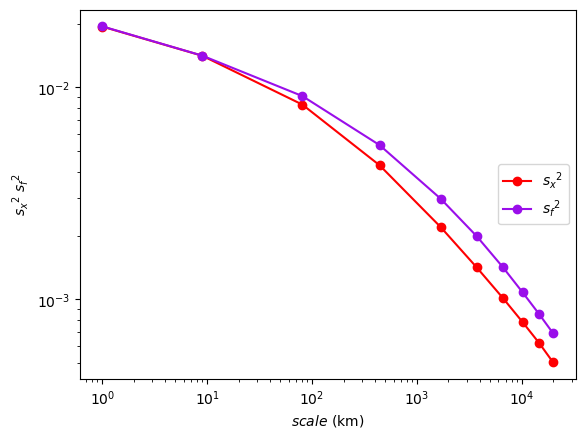

In [263]:
fig,ax=plt.subplots()
    
ax.plot(df_sub.win,df_sub.sx2,c=colorlist[0],marker='o',label=r'${s_x}^2$')
ax.plot(df_sub.win,df_sub.sf2,c=colorlist[1],marker='o',label=r'${s_f}^2$')
#ax.plot(df_fss.scale,df_fss.sfx,c=colorlist[2],marker='o',label=r'$s_{fx}$')

ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(loc='center right')

ax.set_xlabel('$scale$ (km)')
ax.set_ylabel(r'${s_x}^2$ ${s_f}^2$')


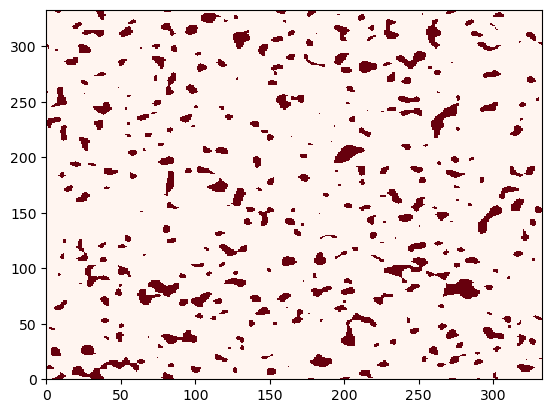

In [334]:
# play with Tim's synthetic forecast generator

global_rng = np.random.default_rng(0xdeadbeef)
REGION_SIGMA = 2.5
BASE_RATE = 0.1
sigmaf=5.
sigmar=1.
bias=1.
weight=0.5
ni, nj = 333, 333

def make_regions(noise, sigma, prob):
    filtered = gaussian_filter(noise, sigma, mode='wrap')
    threshold = np.quantile(filtered, 1 - prob)
    return (filtered > threshold).astype('float')

def generate_truth_field(size, sigma, prob, rng=global_rng):
    noise = rng.random(size)    
    return noise, make_regions(noise, sigma, prob)

def generate_forecast_field(truth_noise, sigma, prob, noise_weight, rng=global_rng):
    noise = rng.random(truth_noise.shape)
    noise = noise_weight * noise + (1 - noise_weight) * truth_noise
    return make_regions(noise, sigma, prob)

truth_noise, obs = generate_truth_field((nj, ni), REGION_SIGMA, BASE_RATE)
rng = np.random.default_rng(0xbeadedfacade)
fcst = generate_forecast_field(truth_noise, sigmaf, bias*BASE_RATE, noise_weight=weight, rng=rng)
rand = generate_forecast_field(truth_noise, sigmar, bias*BASE_RATE, noise_weight=1., rng=rng)
plt.pcolormesh(obs, cmap='Reds')


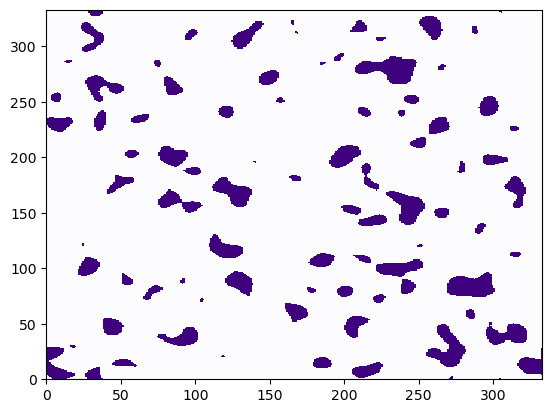

In [335]:
plt.pcolormesh(fcst,cmap='Purples')

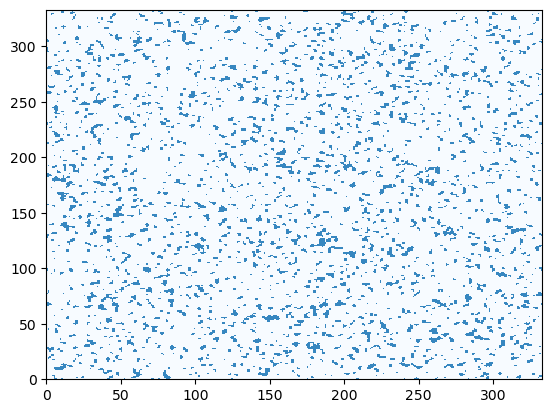

In [338]:
plt.pcolormesh(rand,cmap='Blues',vmin=0.,vmax=1.5)

In [302]:
nwin

array([1.000e+00, 9.000e+00, 2.500e+01, 4.900e+01, 8.100e+01, 1.210e+02,
       1.690e+02, 2.250e+02, 2.890e+02, 3.610e+02, 4.410e+02, 5.290e+02,
       6.250e+02, 7.290e+02, 8.410e+02, 9.610e+02, 1.089e+03, 1.225e+03,
       1.369e+03, 1.521e+03, 1.681e+03, 1.849e+03, 2.025e+03, 2.209e+03,
       2.401e+03, 2.601e+03, 2.809e+03, 3.025e+03, 3.249e+03, 3.481e+03])

In [339]:
# calculate FSS and various stats across a range of 1-D neighborhood windows
# using 'reflective' convolution from scipy.ndimage

fss=np.zeros(30)
pofd=np.zeros_like(fss)
fss=np.zeros_like(fss)
mse1=np.zeros_like(fss)
sf_2=np.zeros_like(fss)
sx_2=np.zeros_like(fss)
sf_x=np.zeros_like(fss)
sf_2_rand=np.zeros_like(fss)
sx_2_rand=np.zeros_like(fss)
sf_x_rand=np.zeros_like(fss)
fbar_1=np.zeros_like(fss)
fbar_rand=np.zeros_like(fss)
xbar_1=np.zeros_like(fss)
nwin=np.zeros_like(fss)
fss_rand=np.zeros_like(fss)
rfx1=np.zeros_like(fss)
rfx2=np.zeros_like(fss)

for n in np.arange(fss.shape[0]):
    iwin=n*2+1         # neighborhood window size in terms of grid points
    win=iwin*iwin*1.0
    print(win)
    obs2=convolve(obs*1.0,np.ones((iwin,iwin))/win,mode='reflect')     # use convolution to calculate the fractions
    fcst2=convolve(fcst*1.0,np.ones((iwin,iwin))/win,mode='reflect')
    rand2=convolve(rand*1.0,np.ones((iwin,iwin))/win,mode='reflect')
    # compute various stats from the fractions
    nwin[n]=iwin*iwin
    sx_2[n]=np.var(obs2)
    sf_2[n]=np.var(fcst2)
    xbar_1[n]=np.mean(obs2)
    fbar_1[n]=np.mean(fcst2)
    sf_x[n]=np.cov([obs2.flatten(),fcst2.flatten()])[0][1]
    fss[n]=1.-np.sum((fcst2-obs2)**2.)/(np.sum(fcst2**2.)+np.sum(obs2**2.))
    rfx1[n]=np.corrcoef([obs2.flatten(),fcst2.flatten()])[0][1]
    sx_2_rand[n]=np.var(obs2)
    sf_2_rand[n]=np.var(rand2)
    fbar_rand[n]=np.mean(rand2)
    sf_x_rand[n]=np.cov([obs2.flatten(),rand2.flatten()])[0][1]
    fss_rand[n]=1.-np.sum((rand2-obs2)**2.)/(np.sum(rand2**2.)+np.sum(obs2**2.))
    rfx2[n]=np.corrcoef([obs2.flatten(),rand2.flatten()])[0][1]


1.0
9.0
25.0
49.0
81.0
121.0
169.0
225.0
289.0
361.0
441.0
529.0
625.0
729.0
841.0
961.0
1089.0
1225.0
1369.0
1521.0
1681.0
1849.0
2025.0
2209.0
2401.0
2601.0
2809.0
3025.0
3249.0
3481.0


Text(0.5, 1.0, 'correlation sharpness vs neighb size')

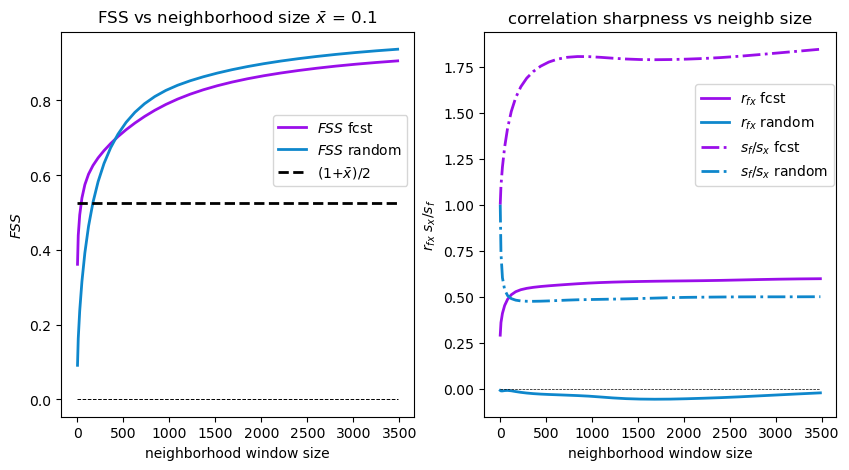

In [340]:
# FSS on the left subplot, correlation and normalized sharpness on the right subplot
# following Antonio and Aitchison (2025)
xbar=np.mean(obs)

fig,ax = plt.subplots(1,2,figsize=(10,5))
axs=ax.flat
axs[0].plot(nwin,fss,c=colorlist[1],lw=2.,label=r'$FSS$ fcst')
axs[0].plot(nwin,fss_rand,c=colorlist[2],lw=2.,label=r'$FSS$ random')
axs[0].plot([0.,3481.],[0.525,0.525],c='k',ls='--',lw=2.,label=r'(1+$\bar x$)/2')
axs[0].plot([0.,3481.],[0.,0.],c='k',ls='--',lw=0.7)
axs[0].legend(loc=[0.6,0.6])
axs[0].set_xlabel('neighborhood window size')
axs[0].set_ylabel(r'$FSS$')
axs[0].set_title(r'FSS vs neighborhood size $\bar x$ ='+f' {np.round(xbar,2)}')
#axs[0].set_xlim(0.,121.)

axs[1].plot(nwin,rfx1,c=colorlist[1],lw=2.,label=r'$r_{fx}$ fcst')
axs[1].plot(nwin,rfx2,c=colorlist[2],lw=2.,label=r'$r_{fx}$ random')
axs[1].plot(nwin,np.sqrt(sf_2)/np.sqrt(sx_2),c=colorlist[1],lw=2.,ls='-.',label=r'$s_f$/$s_x$ fcst')
axs[1].plot(nwin,np.sqrt(sf_2_rand)/np.sqrt(sx_2_rand),c=colorlist[2],lw=2.,ls='-.',label=r'$s_f$/$s_x$ random')

axs[1].plot([0.,3481.],[0.,0.],c='k',ls='--',lw=0.5)
axs[1].legend(loc=[0.6,0.6])
axs[1].set_xlabel('neighborhood window size')
axs[1].set_ylabel(r'$r_{fx}$ $s_x$/$s_f$')
axs[1].set_title(r'correlation sharpness vs neighb size')
#axs[1].set_xlim(0.,121.)



Text(0.5, 1.0, 'autocorrelation factor for blobs')

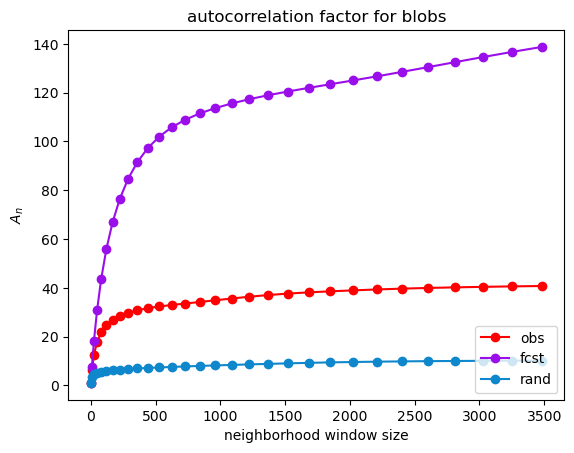

In [341]:
# autocorrelation factor in HRRR RRFS MRMS
fig,ax=plt.subplots()

xbar=np.mean(obs)
s_x_2_0=np.var(obs)
s_f_2_0=np.var(fcst)
a_n_obs=sx_2*nwin/s_x_2_0
a_n_fcst=sf_2*nwin/s_f_2_0
a_n_rand=sf_2_rand*nwin/s_f_2_0
ax.plot(nwin,a_n_obs,c=colorlist[0],marker='o',label=f'obs')

ax.plot(nwin,a_n_fcst,c=colorlist[1],marker='o',ls='-',label=f'fcst')
ax.plot(nwin,a_n_rand,c=colorlist[2],marker='o',ls='-',label=f'rand')


ax.legend(loc='lower right')
ax.set_xlabel('neighborhood window size')
ax.set_ylabel(r'$A_n$')
ax.set_title(r'autocorrelation factor for blobs')



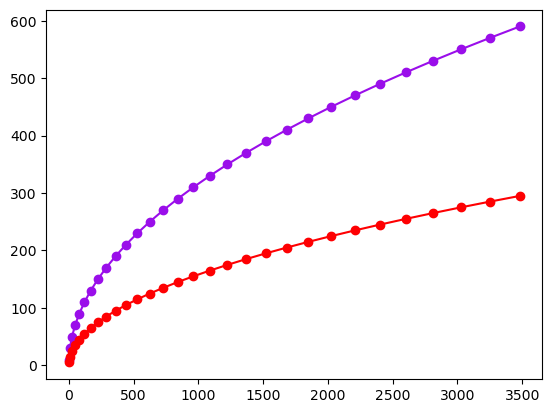

In [323]:
plt.plot(nwin,10.*np.sqrt(nwin),c=colorlist[1],marker='o',ls='-',label=f'fcst')
plt.plot(nwin,5.*np.sqrt(nwin),c=colorlist[0],marker='o',ls='-',label=f'fcst')

Text(0.5, 1.0, 'FSS reference correlation for HRRR RRFS MRMS example')

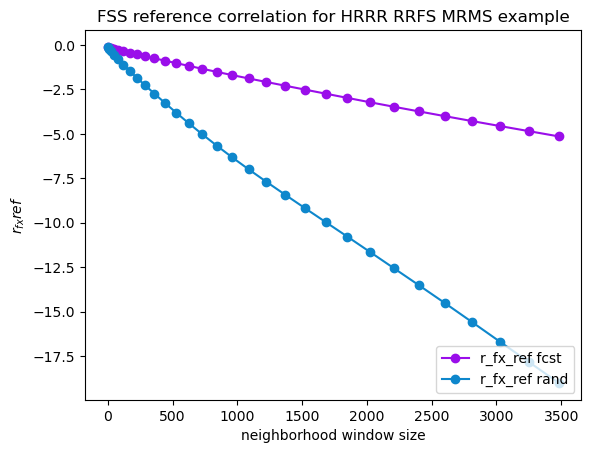

In [342]:
# autocorrelation factor in HRRR RRFS MRMS
fig,ax=plt.subplots()

xbar=np.mean(obs)
fbar=np.mean(fcst)
s_x_2_0=np.var(obs)
s_f_2_0=np.var(fcst)
a_n_obs=sx_2*nwin/s_x_2_0
a_n_fcst=sf_2*nwin/s_f_2_0
rfx_ref_fcst=-fbar*xbar/np.sqrt(sx_2)/np.sqrt(sf_2)
rfx_ref_rand=-fbar*xbar/np.sqrt(sx_2)/np.sqrt(sf_2_rand)
ax.plot(nwin,rfx_ref_fcst,c=colorlist[1],marker='o',label=f'r_fx_ref fcst')
ax.plot(nwin,rfx_ref_rand,c=colorlist[2],marker='o',label=f'r_fx_ref rand')


ax.legend(loc='lower right')
ax.set_xlabel('neighborhood window size')
ax.set_ylabel(r'$r_{fx} ref$')
ax.set_title(r'FSS reference correlation for HRRR RRFS MRMS example')


